# –û—Ç—á—ë—Ç –∫ –¥–æ–º–∞—à–Ω–µ–º—É –∑–∞–¥–∞–Ω–∏—é ‚Ññ1

### –ê–≤—Ç–æ—Ä: –†–æ–º–∞–Ω–æ–≤ –ê–ª–µ–∫—Å–µ–π –î–µ–Ω–∏—Å–æ–≤–∏—á

–ò–º–ø–æ—Ä—Ç –≤—Å–µ—Ö –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install fasttext
import fasttext
from sklearn.metrics import f1_score
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
nltk.download('omw-1.4')
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from multiprocessing import Pool
from collections import Counter
from sklearn.manifold import TSNE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# –ß–∞—Å—Ç—å 1

–ü–µ—Ä–≤—ã–º —à–∞–≥–æ–º —Å–∫–∞—á–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ. –î–∞–Ω–Ω–∞—è —è—á–µ–π–∫–∞ –∫–æ–ø–∏—Ä—É–µ—Ç –∞—Ä—Ö–∏–≤ —Å —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ —Ç–µ–∫—Å—Ç–∞–º–∏ –≤ –Ω–∏–∂–Ω–µ–º —Ä–µ–≥–∏—Å—Ç—Ä–µ –≤ –ø–∞–ø–∫—É –ø—Ä–æ–µ–∫—Ç–∞ —Å Google.–î–∏—Å–∫ –∏ —Ä–∞–∑–∞—Ä—Ö–∏–≤–∏—Ä—É–µ—Ç –µ–≥–æ. –î–ª—è –ø–µ—Ä–µ–∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∑–∞–º–µ–Ω–∏—Ç—å –ø—É—Ç—å –Ω–∞ —Å–≤–æ–π.

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/NLP/hpac_lower_tokenized.zip" .
!unzip hpac_lower_tokenized.zip

–í—ã—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –æ–±—Ä–µ–∑–∞–Ω—ã –¥–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —Å—Ç—Ä–æ–∫ (5000).
  inflating: hpac_source/4615642     
  inflating: hpac_source/7028138     
  inflating: hpac_source/7525139     
  inflating: hpac_source/5172600     
  inflating: hpac_source/3857376     
  inflating: hpac_source/5349382     
  inflating: hpac_source/4716141     
  inflating: hpac_source/2527816     
  inflating: hpac_source/9002674     
  inflating: hpac_source/12377877    
  inflating: hpac_source/4482433     
  inflating: hpac_source/12561875    
  inflating: hpac_source/3958842     
  inflating: hpac_source/2744273     
  inflating: hpac_source/7534883     
  inflating: hpac_source/9342729     
  inflating: hpac_source/9827191     
  inflating: hpac_source/4085248     
  inflating: hpac_source/2801654     
  inflating: hpac_source/6761621     
  inflating: hpac_source/9744246     
  inflating: hpac_source/2422618     
  inflating: hpac_source/11162505    
  infl

1. –ù–∞–π–¥–∏—Ç–µ —Ç–æ–ø-1000 —Å–ª–æ–≤ –ø–æ —á–∞—Å—Ç–æ—Ç–µ –±–µ–∑ —É—á–µ—Ç–∞ —Å—Ç–æ–ø-—Å–ª–æ–≤.

–î–ª—è –±–æ–ª–µ–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –ø–æ–∏—Å–∫–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤ –≤—Ö–æ–∂–¥–µ–Ω–∏–π —Å–ª–æ–≤ –æ–ø—Ä–µ–¥–µ–ª–∏–º –ø—Ä–æ—Å—Ç—É—é —Ñ—É–Ω–∫—Ü–∏—é –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥–∞ —Ç–µ–∫—Å—Ç–æ–≤. –û–Ω–∞ –æ—Å—Ç–∞–≤–ª—è–µ—Ç –≤ —Ç–µ–∫—Å—Ç–µ —Ç–æ–ª—å–∫–æ —Å–ª–æ–≤–∞/—Ü–∏—Ñ—Ä—ã, –ø—Ä–∏–≤–æ–¥–∏—Ç —Å–ª–æ–≤–∞ –∫ –Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ –ø—Ä–æ—Å—Ç—ã–º –ª–µ–º–º–∞—Ç–∏–∑–∞—Ç–æ—Ä–æ–º –¥–ª—è –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ —è–∑—ã–∫–∞, —É–¥–∞–ª—è–µ—Ç —Å—Ç–æ–ø-—Å–ª–æ–≤–∞.

In [ ]:
useless_words = stopwords.words('english') + [""]
regex = re.compile("[A-Za-z0-9]+")
wordnet_lemmatizer = WordNetLemmatizer()

def preproc_text(text, lemmatize = True):
    try:
        result = regex.findall(text.lower())
    except:
        result = []
    new_result = []
    for word in result:
        if lemmatize:
            lemma = wordnet_lemmatizer.lemmatize(word)
        else:
            lemma = word
        if lemma not in useless_words:
            new_result.append(lemma)
    return new_result

def preproc_file(file):
    with open("hpac_source//"+file) as f:
        text = f.read()
    cleaned_tokens = preproc_text(text)
    return cleaned_tokens

–ü—Ä–æ–π–¥—ë–º—Å—è –ø–æ –∫–∞–∂–¥–æ–º—É —Ç–µ–∫—Å—Ç—É –∏ –ø–æ—Å—á–∏—Ç–∞–µ–º —Å–ª–æ–≤–∞:

In [ ]:
files = os.listdir("hpac_source")

lemmas = {}
for i in tqdm(range(len(files))):
    lemmas = dict(Counter(lemmas) + Counter(preproc_file(files[i])))

–° –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ–º —Å–ª–æ–≤ –∫ –Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ —Å—á–∏—Ç–∞–ª–æ—Å—å –¥–æ–≤–æ–ª—å–Ω–æ –¥–æ–ª–≥–æ (–∑–∞ –ø–∞—Ä—É —á–∞—Å–æ–≤ –æ–±—Ä–∞–±–æ—Ç–∞–ª–∞—Å—å —á—É—Ç—å –±–æ–ª—å—à–µ –ø–æ–ª–æ–≤–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤). –û–¥–Ω–∞–∫–æ –±–µ–∑ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–ª—É—á–∞–µ—Ç—Å—è –Ω–µ–º–Ω–æ–≥–æ –¥—Ä—É–≥–æ–π –∏ –º–µ–Ω–µ–µ —á–µ—Å—Ç–Ω—ã–π (—Ç–∞–∫, –æ–¥–Ω–æ –∏ —Ç–æ –∂–µ —Å–ª–æ–≤–æ –≤ —Ä–∞–∑–Ω—ã—Ö —Ñ–æ—Ä–º–∞—Ö —Å—á–∏—Ç–∞–µ—Ç—Å—è –∑–∞ —Ä–∞–∑–Ω—ã–µ –∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, –µ–≥–æ "–ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å" –∑–∞–Ω–∏–∂–∞–µ—Ç—Å—è).

–ö–∞–∫ –æ–∫–∞–∑–∞–ª–æ—Å—å, –≤ —Ç–µ–∫—Å—Ç–∞—Ö –æ—á–µ–Ω—å –º–Ω–æ–≥–æ —Å—Ç—Ä–∞–Ω–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤ (–Ω–µ–ø–æ–Ω—è—Ç–Ω—ã–µ –Ω–∞–±–æ—Ä—ã –±—É–∫–≤ –∏ —Ü–∏—Ñ—Ä). –û—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º —Ç–∞–∫–∏–µ –∏–∑ –Ω–∞—à–µ–≥–æ —Å—á—ë—Ç—á–∏–∫–∞ —Å–ª–æ–≤ –∏ –≤—ã–≤–µ–¥–µ–º —Ç–æ–ø —Å–ª–æ–≤ –ø–æ —á–∞—Å—Ç–æ—Ç–µ.

In [ ]:
result = pd.DataFrame.from_dict(lemmas,orient="index").reset_index().set_axis(["word","num"],axis=1)
top_words = result[(~result["word"].apply(lambda x: x.isnumeric())) & (result["word"].str.len()>1)].sort_values(by="num",ascending=False).iloc[:1000]["word"].values
top_words

array(['harry', 'said', 'would', 'hermione', 'could', 'draco', 'back',
       'one', 'like', 'know', 'eye', 'time', 'looked', 'ron', 'get',
       'asked', 'well', 'even', 'around', 'head', 'see', 'think', 'going',
       'still', 'go', 'ginny', 'face', 'way', 'room', 'severus', 'hand',
       'something', 'want', 'snape', 'thought', 'potter', 'sirius',
       'right', 'away', 'much', 'two', 'look', 'never', 'knew', 'really',
       'first', 'made', 'let', 'good', 'little', 'malfoy', 'felt',
       'turned', 'wand', 'dumbledore', 'james', 'come', 'got', 'make',
       'remus', 'took', 'sure', 'looking', 'door', 'say', 'though',
       'tell', 'dark', 'take', 'lily', 'long', 'u', 'voice', 'last',
       'need', 'told', 'yes', 'man', 'voldemort', 'left', 'wanted',
       'anything', 'oh', 'next', 'came', 'nodded', 'love', 'saw',
       'moment', 'another', 'people', 'thing', 'year', 'hand', 'went',
       'smiled', 'day', 'ca', 'death', 'enough', 'help', 'boy',
       'professor', 'mind'

2. –ù–∞–π–¥–∏—Ç–µ —Ç–æ–ø-10 –ø–æ —á–∞—Å—Ç–æ—Ç–µ: –∏–º–µ–Ω, –ø–∞—Ä –∏–º—è + —Ñ–∞–º–∏–ª–∏—è, –ø–∞—Ä –≤–∏–¥–∞ ''–ø—Ä–æ—Ñ–µ—Å—Å–æ—Ä'' + –∏–º—è / —Ñ–∞–º–∏–ª–∏—è.

–¢–µ–ø–µ—Ä—å –≤—ã—Å—á–∏—Ç–∞–µ–º —Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∏–º–µ–Ω–∞, –∏–º–µ–Ω–∞ + —Ñ–∞–º–∏–ª–∏–∏, –ø—Ä–æ—Ñ–µ—Å—Å–æ—Ä–æ–≤. –î–ª—è —ç—Ç–æ–≥–æ –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ –±—ã–ª –Ω–∞–π–¥–µ–Ω —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –≥–µ—Ä–æ–µ–≤ –∫–Ω–∏–≥ –æ –ì–∞—Ä—Ä–∏ –ü–æ—Ç—Ç–µ—Ä–µ. –¢–æ–≥–¥–∞ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –æ—Å—Ç–∞—ë—Ç—Å—è –ª–∏—à—å –Ω–∞–π—Ç–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–∂–¥–µ–Ω–∏–π –∑–∞–¥–∞–Ω–Ω—ã—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π —Ç–æ–∫–µ–Ω–æ–≤.

–û–¥–Ω–∞–∫–æ —Å–ø–∏—Å–æ–∫ –∏–º—ë–Ω –∏ —Ñ–∞–º–∏–ª–∏–π –Ω—É–∂–Ω–æ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –ø–µ—Ä–µ–¥ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º. –ù–∏–∂–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –æ—á–∏—Å—Ç–∫–∞ –∏–º—ë–Ω –∏ —Ñ–∞–º–∏–ª–∏–π –æ—Ç –ª–∏—à–Ω–∏—Ö –∏–Ω–∏—Ü–∏–∞–ª–æ–≤ –∏ —Å–∏–º–≤–æ–ª–æ–≤, –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∏—Ö –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É. –î–ª—è –ø–æ–∏—Å–∫–∞ –ø—Ä–æ—Ñ–µ—Å—Å–æ—Ä–æ–≤ –¥–µ–ª–∞–µ—Ç—Å—è —Å–ø–∏—Å–æ–∫ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∏–º—ë–Ω –∏ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∞–º–∏–ª–∏–π –∏ –∫ –Ω–∏–º –∫–æ–Ω–∫–∞—Ç–µ–Ω–∏—Ä—É–µ—Ç—Å—è —Å–ª–æ–≤–æ "professor".

In [ ]:
characters = pd.read_csv("harry-potter-characters.csv",usecols=["name"])
names = characters["name"].apply(lambda x: re.sub(r'[^A-z]', '', x.split(" ")[0].lower())).unique()
names_surnames = characters["name"].apply(lambda x:" ".join([re.sub(r'[^A-z]', '', word.lower()) for word in x.split(" ")])).unique()
professors = np.unique(["professor "+re.sub(r'[^A-z]', '', word.lower()) for subset in characters["name"].str.split(" ").values for word in subset])

–î–ª—è —Ä–µ—à–µ–Ω–∏—è –±—É–¥–µ–º –∏—Å–∫–∞—Ç—å –≤—Ö–æ–∂–¥–µ–Ω–∏—è  —Å—Ä–µ–¥—Å—Ç–≤–∞–º–∏ —Ä–µ–≥—É–ª—è—Ä–Ω—ã—Ö –≤—ã—Ä–∞–∂–µ–Ω–∏–π. –í –∫–∞–∂–¥–æ–º —Ç–µ–∫—Å—Ç–µ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –ø–æ–∏—Å–∫ –ø–æ–¥—Å—Ç—Ä–æ–∫, —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—é—â–∏—Ö –∑–∞–¥–∞–Ω–Ω–æ–º—É —Ä–µ–≥—É–ª—è—Ä–Ω–æ–º—É –≤—ã—Ä–∞–∂–µ–Ω–∏—é. –†–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π —Å–∫–æ–±–æ—á–Ω—É—é –≥—Ä—É–ø–ø—É, –∫–æ—Ç–æ—Ä–∞—è –¥–æ–ª–∂–Ω–∞ —Å–æ–¥–µ—Ä–∂–∞—Ç—å –æ–¥–Ω–æ –∏–∑ –∏–º—ë–Ω/–ø–∞—Ä—ã –∏–º—è+—Ñ–∞–º–∏–ª–∏—è –∏–ª–∏ –ø–∞—Ä—ã professor + –∏–º—è/—Ñ–∞–º–∏–ª–∏—è. –¢–æ–≥–¥–∞ –ø–æ–¥—Ö–æ–¥—è—â–∏–µ –ø–æ–¥ —ç—Ç–æ —Ä–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ –ø–æ–¥—Å—Ç—Ä–æ–∫–∏ —ç—Ç–æ –ø–æ–¥—Å—Ç—Ä–æ–∫–∏, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ –æ–¥–Ω–æ –∏–∑ –∑–∞–¥–∞–Ω–Ω—ã—Ö —Ä–∞–Ω–µ–µ —Å–ª–æ–≤–æ—Å–æ—á–µ—Ç–∞–Ω–∏–π.

In [ ]:
data_to_search = pd.concat([
    pd.DataFrame({"words":list(names) + ["voldemort"], "type":["names"]*(names.shape[0]+1)}),
    pd.DataFrame({"words":names_surnames, "type":["names_surnames"]*names_surnames.shape[0]}),
    pd.DataFrame({"words":professors, "type":["professors"]*professors.shape[0]})
])
data_to_search = data_to_search[data_to_search["words"].apply(lambda x: len(set(x.split()).intersection(set(stopwords.words('english')+["lord","great"]))))==0]
regex = re.compile("("+("|".join((data_to_search["words"]).values))+")")

–ü—Ä–æ–≤–µ—Ä–∏–º —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –Ω–∞ 5 —Ç–µ–∫—Å—Ç–∞—Ö:

In [ ]:
files = os.listdir("hpac_source")

lemmas={}
for i in tqdm(range(5)):
    with open("hpac_source//"+files[i]) as f:
        text = f.read()
    lemmas = dict(Counter(lemmas) + Counter(regex.findall(text.lower())))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [00:00<00:00,  5.71it/s]


In [ ]:
lemmas

{'voldemort': 22,
 'ted': 316,
 'narcissa': 4,
 'lucius': 10,
 'draco': 467,
 'cho': 38,
 'ron': 41,
 'mary': 3,
 'harry': 733,
 'professor burbage': 4,
 'charity': 1,
 'severus': 3,
 'nagini': 2,
 'fang': 2,
 'marcus': 1,
 'mrs': 8,
 'stan': 49,
 'lee': 32,
 'hermione': 38,
 'rose': 11,
 'nearly': 6,
 'viktor': 9,
 'colin': 3,
 'teddy': 71,
 'sirius': 24,
 'remus': 11,
 'neville': 14,
 'james': 2,
 'sir': 7,
 'gilderoy': 1,
 'theodore': 2,
 'bill': 1,
 'lavender': 7,
 'parvati': 6,
 'padma': 6,
 'fleur': 29,
 'gabrielle': 7,
 'albus': 2,
 'rita': 2,
 'ginny': 10,
 'oliver': 7,
 'pansy': 11,
 'barty': 6,
 'blaise': 20,
 'lily': 1}

–¢–µ–ø–µ—Ä—å –≤—ã–ø–æ–ª–Ω–∏–º –ø–æ–¥—Å—á—ë—Ç –¥–ª—è –≤—Å–µ—Ö –Ω–∞—à–∏—Ö —Ç–µ–∫—Å—Ç–æ–≤.

In [ ]:
files = os.listdir("hpac_source")

lemmas={}
for i in tqdm(range(len(files))):
    with open("hpac_source//"+files[i]) as f:
        text = f.read()
    lemmas = dict(Counter(lemmas) + Counter(regex.findall(text.lower())))

 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 29445/36225 [2:05:45<28:57,  3.90it/s]


KeyboardInterrupt: ignored

In [ ]:
result = pd.DataFrame.from_dict(lemmas,orient="index").reset_index().set_axis(["word","num"],axis=1)

–¢–æ–ø 10 –∏–º—ë–Ω:

In [ ]:
word_type="names"
pd.merge(
    data_to_search[data_to_search["type"]==word_type].rename(columns={"words":"word"}),
    result,
    on="word",
    how="inner"
).sort_values(by="num",ascending=False)["word"].iloc[:10].values

array(['harry', 'ted', 'hermione', 'ron', 'draco', 'ginny', 'severus',
       'stan', 'sirius', 'cho'], dtype=object)

–¢–æ–ø 10 –ø—Ä–æ—Ñ–µ—Å—Å–æ—Ä–æ–≤:

In [ ]:
word_type="professors"
pd.merge(
    data_to_search[data_to_search["type"]==word_type].rename(columns={"words":"word"}),
    result,
    on="word",
    how="inner"
).sort_values(by="num",ascending=False)["word"].iloc[:10].values

array(['professor snape', 'professor mcgonagall', 'professor dumbledore',
       'professor lupin', 'professor flitwick', 'professor slughorn',
       'professor sprout', 'professor trelawney', 'professor umbridge',
       'professor longbottom'], dtype=object)

# –ß–∞—Å—Ç—å 2

–î–ª—è –Ω–∞—á–∞–ª–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏–º –≤—Å–µ —Ç–µ–∫—Å—Ç—ã –≤ —á–∏—Ç–∞–µ–º–æ–º –¥–ª—è fasttext –≤–∏–¥–µ (—Å–æ—Ö—Ä–∞–Ω–∏–º –≤—Å–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –≤ –æ–¥–∏–Ω —Ñ–∞–π–ª, —Ä–∞–∑–¥–µ–ª—è—è –∏—Ö —Å–∏–º–≤–æ–ª–æ–º –Ω–æ–≤–æ–π —Å—Ç—Ä–æ–∫–∏):

In [ ]:
with open('all_texts_hpac.train', 'w') as f:
    files = os.listdir("hpac_source")
    for i in tqdm(range(len(files))):
        with open("hpac_source//"+files[i]) as g:
            text = g.read()
        f.write(text)
        f.write("\n")

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 36225/36225 [00:24<00:00, 1479.81it/s]


–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ –µ—ë —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ:

In [ ]:
model = fasttext.train_unsupervised('all_texts_hpac.train', "skipgram", dim = 50, thread=12, epoch = 3)
model.save_model("//content//drive//MyDrive//Colab Notebooks//NLP//models//all_texts_hpac_fasttext.bin")

–ü—Ä–æ–≤–µ—Ä–∏–º –∫–∞–∫ —Ö–æ—Ä–æ—à–æ –º–æ–¥–µ–ª—å –≤—ã—É—á–∏–ª–∞ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É —Å–ª–æ–≤–∞–º–∏:

1.–ü—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–π—Ç–µ, –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç –ø–æ–∏—Å–∫ —Å–∏–Ω–æ–Ω–∏–º–æ–≤, –∞—Å—Å–æ—Ü–∏–∞—Ü–∏–π, –ª–∏—à–Ω–∏—Ö —Å–ª–æ–≤ –≤ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏.

–î–ª—è –Ω–∞—á–∞–ª–∞ –ø—Ä–æ–≤–µ—Ä–∏–º —Ä–∞–±–æ—Ç—É –ø–æ–∏—Å–∫–∞ –ø–æ—Ö–æ–∂–∏—Ö —Å–ª–æ–≤:

1. –ü–æ—Ö–æ–∂–∏–µ —Å–ª–æ–≤–∞ –Ω–∞ —Å–ª–æ–≤–æ voldemort (–¥–ª—è –ª—É—á—à–µ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏ –∏–∑ –≤—ã–¥–∞—á–∏ —É–¥–∞–ª–µ–Ω—ã —Å–ª–æ–≤–∞ voldemort —Å –æ–ø–µ—á–∞—Ç–∫–∞–º–∏, –∫–æ—Ç–æ—Ä—ã—Ö –±—ã–ª–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Å—Ä–µ–¥–∏ –±–ª–∏–∂–∞–π—à–∏—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤, —á—Ç–æ —Ç–æ–∂–µ –Ω–µ–ø–ª–æ—Ö–æ, –Ω–æ –Ω–∞–º –∏–Ω—Ç–µ—Ä–µ—Å–Ω–∞ –µ—â—ë –∏ –±–ª–∏–∑–æ—Å—Ç—å —Å –¥—Ä—É–≥–∏–º–∏ —Å–ª–æ–≤–∞–º–∏):

In [ ]:
similars = model.get_nearest_neighbors('voldemort',100)
count = 0
for similar in similars:
    if count>=10:
        break
    if "vold" not in similar[1]:
        count+=1
        print(similar)

(0.8686057329177856, 'lord')
(0.8638769388198853, 'valdemort')
(0.8273025751113892, 'he-who-must')
(0.8177664279937744, 'grindelwald')
(0.817740797996521, 'gellert')
(0.81370609998703, 'vodemort')
(0.807615339756012, 'deatheather')
(0.8048369288444519, 'demort')
(0.8034046292304993, 'deatheater')
(0.801332414150238, 'he-who-must-not-be')


–î–æ–≤–æ–ª—å–Ω–æ –Ω–µ–ø–ª–æ—Ö–æ, –≤–µ–¥—å —É –Ω–∞—Å –∑–¥–µ—Å—å —Å–æ–±—Ä–∞–ª–∏—Å—å –∏ –¥—Ä—É–≥–∏–µ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –≥–µ—Ä–æ–∏ (deatheather, grindelwald), –∏ –æ–ø–µ—á–∞—Ç–∫–∏ —Å–ª–æ–≤–∞ voldemort, –∏ –µ–≥–æ –ø—Ä–æ–∑–≤–∏—â–∞ (he-who-must-not-be ...).

2. –î–ª—è —Å–ª–æ–≤–∞ harry —Å–∞–º—ã–µ –±–ª–∏–∑–∫–∏–µ –≤–µ–∫—Ç–æ—Ä–∞ - –≤–µ–∫—Ç–æ—Ä–∞ –µ–≥–æ –¥—Ä—É–∑–µ–π –∏ —à–∫–æ–ª—å–Ω–æ–≥–æ –≤—Ä–∞–≥–∞.

In [ ]:
model.get_nearest_neighbors('harry',5)

[(0.8903449177742004, 'hermione'),
 (0.8820620775222778, '.'),
 (0.8670722246170044, 'he'),
 (0.8656813502311707, 'ron'),
 (0.8599306344985962, 'draco')]

3. –ü—Ä–æ–≤–µ—Ä—è–µ–º —á—Ç–æ –±–ª–∏–∂–∞–π—à–µ–µ –∫ —Å–ª–æ–≤—É "privet" (–ø–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏—é –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å drive, –≥–¥–µ –∂–∏–ª –ì–∞—Ä—Ä–∏ –ü–æ—Ç—Ç–µ—Ä).

In [ ]:
model.get_nearest_neighbors('privet',1)

[(0.8567904829978943, 'drive')]

4. –ö —Å–ª–æ–≤—É avada –±–ª–∏–∂–∞–π—à–∏–µ —Ä–∞–∑–Ω—ã–µ –Ω–∞–ø–∏—Å–∞–Ω–∏—è —ç—Ç–æ–≥–æ –∑–∞–∫–ª–∏–Ω–∞–Ω–∏—è (–æ–ø–µ—á–∞—Ç–∫–∏) –∏ –¥—Ä—É–≥–∏–µ –Ω–µ–ø—Ä–æ—Å—Ç–∏—Ç–µ–ª—å–Ω—ã–µ –∑–∞–∫–ª–∏–Ω–∞–Ω–∏—è (cruicio).

In [ ]:
model.get_nearest_neighbors('avada',25)

[(0.959877610206604, 'kedavra'),
 (0.9570379257202148, 'kedav'),
 (0.9559561014175415, 'avada_kedavra'),
 (0.9484478831291199, 'avada_kedavras'),
 (0.9458463788032532, 'kadavra'),
 (0.9449848532676697, 'kedava'),
 (0.943509042263031, 'kedvra'),
 (0.933820366859436, 'kedavera'),
 (0.9334129691123962, 'kedavara'),
 (0.9255278706550598, 'keda'),
 (0.9252216815948486, 'adavra'),
 (0.9220765233039856, 'kedarva'),
 (0.917157769203186, 'avad'),
 (0.9128288626670837, 'kedarava'),
 (0.9104545712471008, 'avadra'),
 (0.9065098166465759, 'kedevra'),
 (0.8847200274467468, 'kedrava'),
 (0.8841072916984558, 'kadavera'),
 (0.8744922280311584, 'avada-ed'),
 (0.8719797134399414, 'kadava'),
 (0.8714974522590637, 'kedvara'),
 (0.8710869550704956, 'crucio'),
 (0.8663289546966553, 'aveda'),
 (0.8641036152839661, 'kedabra'),
 (0.8595463633537292, 'cruicio')]

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –º–æ–∂–µ–º —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –ø–æ–∏—Å–∫ –ø–æ—Ö–æ–∂–∏—Ö —Å–ª–æ–≤ —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–æ–≤–æ–ª—å–Ω–æ –Ω–µ–ø–ª–æ—Ö–æ, —Ç–∞–∫ –∫–∞–∫ –≤–æ –≤—Å–µ—Ö —Ç–µ—Å—Ç–∞—Ö –º–æ–¥–µ–ª—å –≤—ã–¥–∞—ë—Ç –∑–¥—Ä–∞–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã (–¥–∞–∂–µ –Ω–µ –ø—Ä–∏—à–ª–æ—Å—å –≤—ã–∏—Å–∫–∏–≤–∞—Ç—å –ø—Ä–∏–≥–æ–¥–Ω—ã–µ –ø—Ä–∏–º–µ—Ä—ã).

–¢–µ–ø–µ—Ä—å –ø—Ä–æ–≤–µ—Ä–∏–º –ø–æ–∏—Å–∫ –∞—Å—Å–æ—Ü–∏–∞—Ü–∏–π:

1. –°–º—ã—Å–ª –∞—Å—Å–æ—Ü–∏–∞—Ü–∏–∏: lily - –∂–µ–Ω–∞ james, –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è –≤—ã–≤–µ—Å—Ç–∏ –∂–µ–Ω—É –¥–ª—è arthur (–ø—Ä–∞–≤–∏–ª—å–Ω—ã–π –æ—Ç–≤–µ—Ç - molly)

In [ ]:
model.get_analogies("lily", "james", "arthur")

[(0.8888817429542542, 'molly'),
 (0.8459604978561401, 'arthurs'),
 (0.824330747127533, 'grandys'),
 (0.815710186958313, 'grangie'),
 (0.8134638667106628, 'mrs.weasley'),
 (0.8110072016716003, 'mrs.'),
 (0.7964476346969604, 'angie'),
 (0.7953779101371765, 'bill'),
 (0.7906737327575684, 'mrs'),
 (0.7858814001083374, 'mollys')]

2. –°–º—ã—Å–ª –∞—Å—Å–æ—Ü–∏–∞—Ü–∏–∏: pigwidgeon - —Å–æ–≤–∞ —É ron, –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è –≤—ã–≤–µ—Å—Ç–∏ —Å–æ–≤—É –¥–ª—è harry (–ø—Ä–∞–≤–∏–ª—å–Ω—ã–π –æ—Ç–≤–µ—Ç - hedwig)

In [ ]:
model.get_analogies("pigwidgeon", "ron", "harry")

[(0.8599695563316345, 'hedwig'),
 (0.839804470539093, 'hedwigs'),
 (0.8169521689414978, 'pigwideon'),
 (0.814536452293396, 'owl'),
 (0.8129394054412842, 'hooter'),
 (0.7940885424613953, 'bird'),
 (0.7847358584403992, 'hooted'),
 (0.7654615044593811, 'hoot'),
 (0.7622032761573792, 'flapper'),
 (0.7549806833267212, 'messenger')]

3. –°–º—ã—Å–ª –∞—Å—Å–æ—Ü–∏–∞—Ü–∏–∏: padfoot - –ø—Ä–æ–∑–≤–∏—â–µ sirius-–∞, –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è –≤—ã–≤–µ—Å—Ç–∏ –ø—Ä–æ–∑–≤–∏—â–µ –¥–ª—è remus (–ø—Ä–∞–≤–∏–ª—å–Ω—ã–π –æ—Ç–≤–µ—Ç - moony).

In [ ]:
model.get_analogies("padfoot", "sirius", "remus")

[(0.942560613155365, 'moony'),
 (0.9159247875213623, 'prongs'),
 (0.9106904864311218, 'padfoots'),
 (0.8983641266822815, 'prongsy'),
 (0.8949417471885681, 'mooney'),
 (0.8768422603607178, 'prongsh'),
 (0.8697264790534973, 'padfood'),
 (0.8583176732063293, 'dadfoot'),
 (0.8581278920173645, 'padf'),
 (0.8480374217033386, 'prongsie')]

–ê—Å—Å–æ—Ü–∏–∞—Ü–∏–∏ —Ç–∞–∫–∂–µ —Ä–∞–±–æ—Ç–∞—é—Ç –æ—á–µ–Ω—å –Ω–µ –ø–ª–æ—Ö–æ.

2. –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ç–æ–ø-1000 —Å–ª–æ–≤ –ø–æ —á–∞—Å—Ç–æ—Ç–µ –±–µ–∑ —É—á–µ—Ç–∞ —Å—Ç–æ–ø-—Å–ª–æ–≤ (–ø. 1.1) —Å –ø–æ–º–æ—â—å—é TSNE –∏–ª–∏ UMAP

In [ ]:
embeds = []
for word in top_words:
    embeds.append(model[word])
embeds=np.array(embeds)

In [ ]:
tsne = TSNE()
embed_tsne = tsne.fit_transform(embeds)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


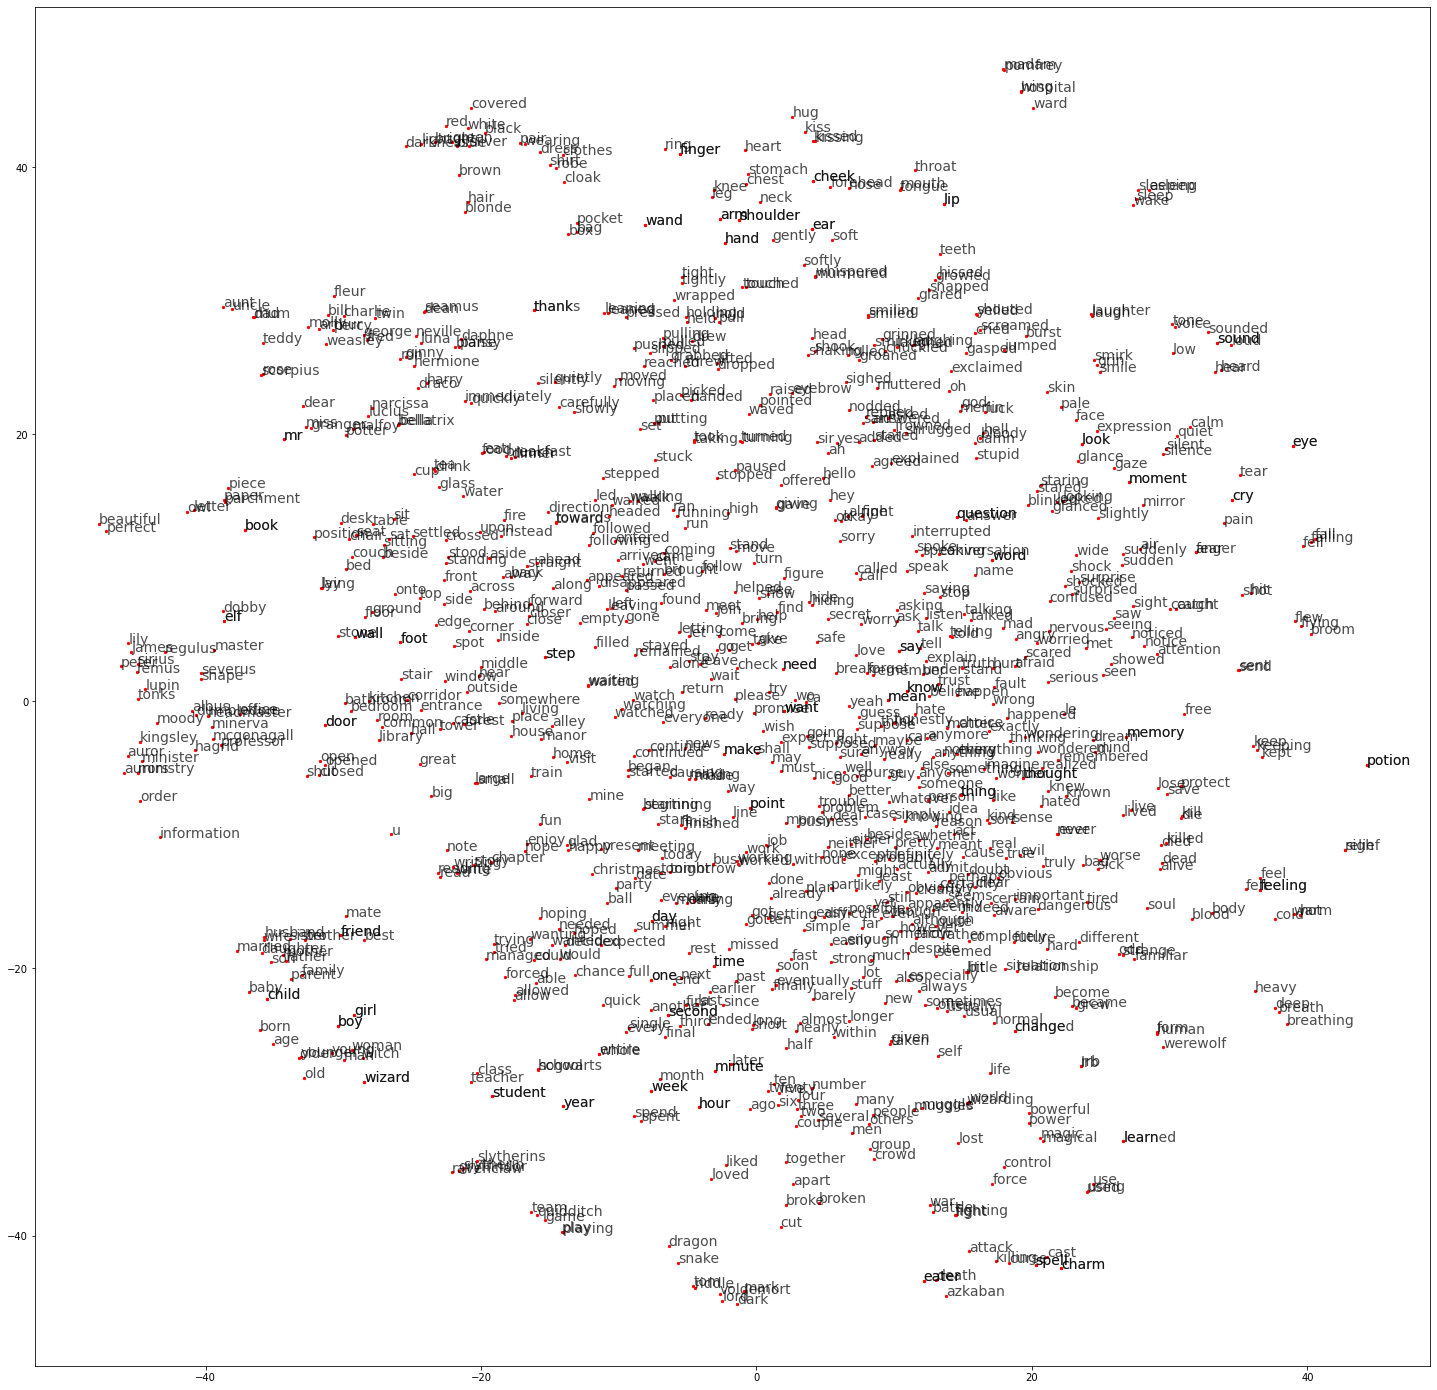

In [ ]:
plt.figure(figsize=(25, 25))
for idx in range(len(top_words)):
    plt.scatter(*embed_tsne[idx, :], color="r",s=5)
    plt.annotate(top_words[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7,fontsize=14)

–ü–æ–ª—É—á–∏–ª–æ—Å—å —Ç–∞–∫–∂–µ –¥–æ–≤–æ–ª—å–Ω–æ –Ω–µ–ø–ª–æ—Ö–æ. –°—Ä–µ–¥–∏ —Å–≥—É—Å—Ç–∫–æ–≤ –Ω–µ—Ä–µ–¥–∫–æ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ø–æ—Ö–æ–∂–∏–µ —Å–ª–æ–≤–∞, –Ω–∞–ø—Ä–∏–º–µ—Ä:

a) dobby, elf

b) quidditch, team, play ...

c) slutherins, ravenclaw ...

d) snake, voldemort, dark

e) azkaban, deatheater

f) student, teacher, class

...

# –ß–∞—Å—Ç—å 3

–¢–µ–ø–µ—Ä—å —Ä–µ—à–∏–º –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –∞ –∏–º–µ–Ω–Ω–æ –±—É–¥–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å, –∫–∞–∫–æ–µ –∏–º–µ–Ω–Ω–æ –∑–∞–∫–ª–∏–Ω–∞–Ω–∏–µ –±—É–¥–µ—Ç –ø—Ä–æ–∏–∑–Ω–µ—Å–µ–Ω–æ –ø–æ —Ç–µ–∫—Å—Ç—É, –æ–ø–∏—Å—ã–≤–∞—é—â–µ–º—É —Å–∏—Ç—É–∞—Ü–∏—é.

–°–∫–∞—á–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ. –î–∞–Ω–Ω–∞—è —è—á–µ–π–∫–∞ –∫–æ–ø–∏—Ä—É–µ—Ç –∞—Ä—Ö–∏–≤ —Å —Ç–µ–∫—Å—Ç–∞–º–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ —Ä–∞–∑–∞—Ä—Ö–∏–≤–∏—Ä—É–µ—Ç –µ–≥–æ. –î–ª—è –ø–µ—Ä–µ–∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∑–∞–º–µ–Ω–∏—Ç—å –ø—É—Ç—å –Ω–∞ —Å–≤–æ–π.

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/NLP/hpac_splits.zip" .
!unzip hpac_splits.zip

Archive:  hpac_splits.zip
   creating: hpac_corpus/
  inflating: hpac_corpus/hpac_training_128.tsv  
   creating: __MACOSX/
   creating: __MACOSX/hpac_corpus/
  inflating: __MACOSX/hpac_corpus/._hpac_training_128.tsv  
  inflating: hpac_corpus/hpac_dev_128.tsv  
  inflating: __MACOSX/hpac_corpus/._hpac_dev_128.tsv  
  inflating: hpac_corpus/hpac_test_128.tsv  
  inflating: __MACOSX/hpac_corpus/._hpac_test_128.tsv  
  inflating: __MACOSX/._hpac_corpus  


–ß–∏—Ç–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è, –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –≥–æ—Ç–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π:

In [ ]:
train=pd.read_csv('hpac_corpus//hpac_training_128.tsv', sep='\t', names=["tmp","target","text"])
val=pd.read_csv('hpac_corpus//hpac_dev_128.tsv', sep='\t', names=["tmp","target","text"])
test=pd.read_csv('hpac_corpus//hpac_test_128.tsv', sep='\t', names=["tmp","target","text"])

–î–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–π –ø—Ä–æ–≤–µ—Ä–∫–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –Ω–∞ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å –ø–æ—Å—Ç—Ä–æ–∏–º —Å–∞–º—ã–π –ø—Ä–æ—Å—Ç–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä, –≤—ã–¥–∞—é—â–∏–π –≤—Å–µ–≥–¥–∞ –æ–¥–∏–Ω –æ—Ç–≤–µ—Ç - —Å–∞–º—ã–π —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–π—Å—è –∫–ª–∞—Å—Å:

In [ ]:
base_pred = train["target"].value_counts().index[0]
print(f"–°–∞–º—ã–π —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–π—Å—è –∫–ª–∞—Å—Å: {base_pred}")

–°–∞–º—ã–π —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–π—Å—è –∫–ª–∞—Å—Å: AVADA_KEDAVRA


–¢–µ–ø–µ—Ä—å –ø–æ—Å—á–∏—Ç–∞–µ–º —Ü–µ–ª–µ–≤—É—é –º–µ—Ä–∏–∫—É —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞:

In [ ]:
score = f1_score(test["target"],np.array([base_pred]*test.shape[0]),average="macro")
print(f"F1 (macro avg.) = {score}")

F1 (macro avg.) = 0.0025349911898666843


–í–∏–¥–∏–º, —á—Ç–æ –∫–∞—á–µ—Å—Ç–≤–æ —ç—Ç–æ–≥–æ –±–∞–∑–æ–≤–æ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ —Ä–∞–≤–Ω–æ –∫–∞—á–µ—Å—Ç–≤—É, –ø—Ä–∏–≤–µ–¥—ë–Ω–Ω–æ–º—É –≤ —Å—Ç–∞—Ç—å–µ, —Ç–æ –µ—Å—Ç—å –¥–µ–ª–∞–µ–º –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ, —á—Ç–æ –∫–∞—á–µ—Å—Ç–≤–æ –∏ —Å–ª–æ–∂–Ω–æ—Å—Ç—å —Ç–µ–∫—Å—Ç–æ–≤ –Ω–µ —Å–∏–ª—å–Ω–æ –ø–æ–º–µ–Ω—è–ª–æ—Å—å —Å —Ç–µ—Ö –≤—Ä–µ–º—ë–Ω. –ü–æ—ç—Ç–æ–º—É –±—É–¥–µ–º —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞—à–∏—Ö –º–æ–¥–µ–ª–µ–π —Å –ø—Ä–∏–≤–µ–¥—ë–Ω–Ω—ã–º–∏ –≤ —Å—Ç–∞—Ç—å–µ –∏ –±—É–¥–µ–º –ø—ã—Ç–∞—Ç—å—Å—è –∏—Ö –ø–æ–±–∏—Ç—å.

1. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ fastText –≤ –∫–∞—á–µ—Å—Ç–≤–µ baseline-–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞.

fastText –∏–∑ –∫–æ—Ä–æ–±–∫–∏ –º–æ–∂–µ—Ç –æ–±—É—á–∞—Ç—å—Å—è –Ω–∞ –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –ò—Å–ø–æ–ª—å–∑—É–µ–º —ç—Ç–æ –∏ –æ–±—É—á–∏–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä. –ü–µ—Ä–µ–¥ —ç—Ç–∏–º —Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º —Ñ–∞–π–ª —Å –¥–∞–Ω–Ω—ã–º–∏ –¥–ª—è –º–æ–¥–µ–ª–∏ fastText –≤ —á–∏—Ç–∞–µ–º–æ–º –¥–ª—è –Ω–µ—ë —Ñ–æ—Ä–º–∞—Ç–µ (–∑–∞–ø–∏—Å—ã–≤–∞–µ–º –≤—Å—ë –≤ –æ–¥–∏–Ω —Ñ–∞–π–ª —Å —Ñ–æ—Ä–º–∞—Ç–æ–º —Å—Ç—Ä–æ–∫–∏ "__ label __{–º–µ—Ç–∫–∞ –∫–ª–∞—Å—Å–∞} {—Ç–µ–∫—Å—Ç}".

In [ ]:
ft_train = pd.concat([train,val])
ft_train["data"] = "__label__" + ft_train["target"] + " " + ft_train["text"]
with open('hpac.train', 'w') as f:
    f.write("\n".join(ft_train["data"].values))

–û–±—É—á–∏–º –¥–ª—è –Ω–∞—á–∞–ª–∞ —Å –±–∞–∑–æ–≤—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∏ —Å–æ—Ö—Ä–∞–Ω–∏–º –º–æ–¥–µ–ª—å:

In [ ]:
model = fasttext.train_supervised(input="hpac.train")
model.save_model("//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_fasttext.bin")

–ü—Ä–æ–∏–∑–≤–µ–¥—ë–º –ø–æ–¥—Å—á—ë—Ç –∫–∞—á–µ—Å—Ç–≤–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ (–±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å —Ü–µ–ª–µ–≤—É—é –º–µ—Ç—Ä–∏–∫—É, —Ç–æ –µ—Å—Ç—å F1 (macro avg.)):

In [ ]:
ft_test_pred = np.array(model.predict(list(test["text"].values))[0]).reshape(-1)
ft_test_pred = np.array([s.replace("__label__","") for s in ft_test_pred])

In [ ]:
score = f1_score(test["target"],ft_test_pred,average="macro")
print(f"F1 (macro avg.) = {score}")

F1 (macro avg.) = 0.021693454230444626


–ö–∞—á–µ—Å—Ç–≤–æ —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ –∑–∞–º–µ—Ç–Ω–æ –ª—É—á—à–µ, —á–µ–º —É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞, –≤—ã–¥–∞—é—â–µ–æ —Å–∞–º—ã–π —á–∞—Å—Ç—ã–π –∫–ª–∞—Å—Å. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –µ–≥–æ –∫–∞–∫ baseline. –í—Å—ë —Ä–∞–≤–Ω–æ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–µ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–µ–µ, –ø–æ—ç—Ç–æ–º—É –ø–æ–ø—Ä–æ–±—É–µ–º —Ç–∞–∫–∂–µ —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö, —Ç–∞–∫ –∫–∞–∫ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –∏—Ö –º–∞–ª–æ. –ù–µ —Ç—Ä–æ–≥–∞–µ–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, —Ç–∞–∫ –∫–∞–∫ –ø—Ä–∞–∫—Ç–∏–∫–∞ –ø–æ–∫–∞–∑–∞–ª–∞, —á—Ç–æ –µ—Å–ª–∏ —ç—Ç–æ –¥–µ–ª–∞—Ç—å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–∞ fasttext, –ø–µ—Ä–µ–¥–∞–≤ –µ–º—É –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç, —Ç–æ –º–æ–¥–µ–ª—å —Å–∏–ª—å–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–∞–µ—Ç—Å—è –ø–æ–¥ –Ω–µ–≥–æ, –∏–º–µ—è –Ω–∏–∑–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–µ.

In [ ]:
model = fasttext.train_supervised(input="hpac.train", epoch=20, loss='hs')
model.save_model("//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_fasttext.bin")

In [ ]:
ft_test_pred = np.array(model.predict(list(test["text"].values))[0]).reshape(-1)
ft_test_pred = np.array([s.replace("__label__","") for s in ft_test_pred])

In [ ]:
score = f1_score(test["target"],ft_test_pred,average="macro")
print(f"F1 (macro avg.) = {score}")

F1 (macro avg.) = 0.06396984495921618


–î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —É–ª—É—á—à–µ–Ω–∏–µ –µ—Å—Ç—å. –°—É–¥—è –ø–æ –ø—Ä–∏–≤–µ–¥—ë–Ω–Ω—ã–º –≤ —Å—Ç–∞—Ç—å–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º baseline –ø–æ–ª—É—á–∏–ª—Å—è –Ω–µ–ø–ª–æ—Ö–æ–π, —Ç–∞–∫ –∫–∞–∫ –∫–∞—á–µ—Å—Ç–≤–æ —Å—Ä–∞–≤–Ω–∏–º–æ —Å –Ω–µ–∫–æ—Ç–æ—Ä—ã–º–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω—ã–º–∏ –∞–≤—Ç–æ—Ä–∞–º–∏ –º–æ–¥–µ–ª—è–º–∏.

2. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Å–≤–µ—Ä—Ç–æ—á–Ω—ã–µ –∏–ª–∏ —Ä–µ–∫–∫—É—Ä–µ–Ω—Ç–Ω—ã–µ —Å–µ—Ç–∏ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –±–æ–ª–µ–µ –ø—Ä–æ–¥–≤–∏–Ω—É—Ç–æ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞. –ü–æ—ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∏ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å—é —Ñ–∏–ª—å—Ç—Ä–æ–≤, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ä–∞–∑–Ω—ã–µ —Ä–∞–∑–º–µ—Ä—ã –æ–∫–æ–Ω, –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å  k -max pooling.

–í –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ –±—ã–ª–∏ –≤—ã–±—Ä–∞–Ω—ã —Ä–µ–∫–∫—É—Ä–µ–Ω—Ç–Ω—ã–µ –Ω–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏, —Ç–∞–∫ –∫–∞–∫, —Å—É–¥—è –ø–æ —Å—Ç–∞—Ç—å–µ, –æ–Ω–∏ –ø–æ–∫–∞–∑–∞–ª–∏ —Å–µ–±—è –ª—É—á—à–µ –¥—Ä—É–≥–∏—Ö –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π. –¢–∞–∫ –∫–∞–∫ —Ç–µ–∫—Å—Ç—ã –¥–æ–≤–æ–ª—å–Ω–æ –¥–ª–∏–Ω–Ω—ã–µ (–º–∞–∫—Å–∏–º—É–º 128 —Ç–æ–∫–µ–Ω–æ–≤), —Ç–æ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤–∞—Ä–∏–∞—Ü–∏—é LSTM, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –º–µ–Ω–µ–µ –≤—Å–µ—Ö –ø—Ä–µ–¥—Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –∫ –∑–∞–±—ã–≤–∞–Ω–∏—é. –ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ LSTM –±—É–¥–µ–º —Å–ª–µ–¥–æ–≤–∞—Ç—å —Å–æ–≤–µ—Ç—É –∏–∑ —Å—Ç–∞—Ç—å–∏: –Ω–∞ –≤—Ö–æ–¥ —Ä–µ–∫—É—Ä—Ä–µ–Ω—Ç–Ω–æ–π —Å–µ—Ç–∫–µ –±—É–¥–µ–º –ø–æ–¥–∞–≤–∞—Ç—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ —Ç–æ–∫–µ–Ω–æ–≤ —Ç–µ–∫—Å—Ç–∞, –ø—Ä–∏—á—ë–º —ç–º–±–µ–¥–¥–∏–Ω–≥ –±—É–¥–µ—Ç —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å—Å—è –ø—É—Ç—ë–º –∫–æ–Ω–∫–∞—Ç–µ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ —Ä–∞–Ω–µ–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ –∏–∑ fasttext –∏ —Å–≤–æ–µ–≥–æ –æ–±—É—á–∞–µ–º–æ–≤–æ–≥–æ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ (–ø—Ä–∞–∫—Ç–∏–∫–∞ –ø–æ–∫–∞–∑–∞–ª–∞, —á—Ç–æ —Ç–∞–∫ –º–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è —Å–∏–ª—å–Ω–æ –±—ã—Å—Ç—Ä–µ–µ).

–î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Å–¥–µ–ª–∞–µ–º —Å–ø–∏—Å–æ–∫ —Å–ª–æ–≤, –≤ –∫–æ—Ç–æ—Ä—ã–π –¥–æ–±–∞–≤–∏–º —Å–ª–æ–≤–æ "\<pad\>", —Å–ª–æ–≤–∞—Ä–∏ –¥–ª—è –ø–µ—Ä–µ–≤–æ–¥–∞ —Å–ª–æ–≤ –≤ –∏–Ω–¥–µ–∫—Å—ã, –∫–ª–∞—Å—Å–æ–≤ –≤ –∏–Ω–¥–µ–∫—Å—ã –∏ –Ω–∞–æ–±–æ—Ä–æ—Ç (–¥–∞–ª–µ–µ –±—É–¥–µ—Ç –æ–ø–∏—Å–∞–Ω–æ –∑–∞—á–µ–º —ç—Ç–æ –±–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω–æ):

In [ ]:
words = np.array(pd.concat([train["text"],val["text"],test["text"]]).apply(lambda x: x.split(" ")).values)
words = sorted(list(set([word for subtext in words for word in subtext])))
words = words + ["<pad>",]
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤ –≤ –∫–æ—Ä–ø—É—Å–µ: {len(words)}")

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤ –≤ –∫–æ—Ä–ø—É—Å–µ: 63640


In [ ]:
int2word = dict(enumerate(words))
word2int = {word: num for num, word in int2word.items()}

int2class = dict(enumerate(np.sort(train["target"].unique())))
class2int = {word: num for num, word in int2class.items()}

–≠—Ç–æ –¥–µ–π—Å—Ç–≤–∏–µ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —É–¥–æ–±–Ω–æ–µ –∏—Ç–µ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ –±–∞—Ç—á–∞–º –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º. –¢–µ–ø–µ—Ä—å –æ–ø–∏—à—É –º–æ–π –≤–∞—Ä–∏–∞–Ω—Ç —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –±–∞—Ç—á–µ–π. –ü—É—Å—Ç—å –±–∞—Ç—á - –Ω–∞–±–æ—Ä –∏–∑ $N$ —Ç–µ–∫—Å—Ç–æ–≤. –ö–∞–∂–¥—ã–π i-–π —Ç–µ–∫—Å—Ç –¥–µ–ª–∏—Ç—Å—è –Ω–∞ —Ç–æ–∫–µ–Ω—ã, –ø–æ—Å–ª–µ —á–µ–≥–æ –∫–∞–∂–¥—ã–π j-–π —Ç–æ–∫–µ–Ω –≤ –∫–∞–∂–¥–æ–º i-–º —Ç–µ–∫—Å—Ç–µ –∫–æ–¥–∏—Ä—É–µ—Ç—Å—è —Å–≤–æ–∏–º –∏–Ω–¥–µ–∫—Å–æ–º –≤ —Å–ª–æ–≤–∞—Ä–µ. –¢–æ–≥–¥–∞ –ø–æ–ª—É—á–∞–µ–º, —á—Ç–æ i-–π —Ç–µ–∫—Å—Ç –ø—Ä–µ–≤—Ä–∞—â–∞–µ—Ç—Å—è –≤ –º–∞—Å—Å–∏–≤ –∏–Ω–¥–µ–∫—Å–æ–≤ –≤—Ö–æ–¥—è—â–∏—Ö –≤ –Ω–µ–≥–æ —Å–ª–æ–≤. –î–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –±–∞—Ç—á –∏–º–µ–ª –ø–æ—Å—Ç–æ—è–Ω–Ω—É—é —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å, –±–æ–ª–µ–µ –∫–æ—Ç–æ—Ä–∫–∏–µ —Ç–µ–∫—Å—Ç—ã –≤ –±–∞—Ç—á–µ –¥–æ–∑–∞–ø–æ–ª–Ω—è—é—Ç—Å—è –∏–Ω–¥–µ–∫—Å–∞–º–∏ —Ç–æ–∫–µ–Ω–∞ \<pad\>.

–¢–µ–ø–µ—Ä—å —Å–¥–µ–ª–∞–µ–º –∫–ª–∞—Å—Å –¥–∞—Ç–∞—Å–µ—Ç–∞, –∫–æ—Ç–æ—Ä—ã–π —ç—Ç–æ —Ä–µ–∞–ª–∏–∑—É–µ—Ç.

In [ ]:
class HPDataset(Dataset):
    def __init__(self, data, word2int, class2int):
        self.pad_index=word2int["<pad>"]
        self.texts = np.array(list(data["text"].apply(lambda x: [word2int[token] for token in x.split(" ")] + [self.pad_index]*(128-len(x.split(" "))))))
        self.targets=data["target"].apply(lambda x: class2int[x]).values

    def __len__(self):
        return self.texts.shape[0]
    
    def __getitem__(self, index):
        return self.texts[index], self.targets[index]

–¢–µ–ø–µ—Ä—å —Ä–µ–∞–ª–∏–∑—É–µ–º –∫–ª–∞—Å—Å –º–æ–¥–µ–ª–∏. –ü—Ä–∏ forward pass –º–æ–¥–µ–ª—å –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –±–∞—Ç—á —Ç–µ–∫—Å—Ç–æ–≤ –≤ —Ñ–æ—Ä–º–µ, –æ–ø–∏—Å–∞–Ω–Ω–æ–π –≤—ã—à–µ (—Ç–æ –µ—Å—Ç—å —Ç–µ–∫—Å—Ç - —Å–ø–∏—Å–æ–∫ –∏–Ω–¥–µ–∫—Å–æ–≤ –≤—Ö–æ–¥—è—â–∏—Ö –≤ –Ω–µ–≥–æ —Ç–æ–∫–µ–Ω–æ–≤). –ü–æ –ø–µ—Ä–µ–¥–∞–Ω–Ω—ã–º –≤ –±–∞—Ç—á–µ –∏–Ω–¥–µ–∫—Å–∞–º —Ç–æ–∫–µ–Ω–æ–≤ –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç—Å—è –∏—Ö —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –∏–∑ –ø–µ—Ä–µ–¥–∞–Ω–Ω–æ–π fasttext_model –∏ –∑–∞—Ç–µ–º –∫–æ–Ω–∫–∞—Ç–µ–Ω–∏—Ä—É—é—Ç—Å—è —É–∂–µ —Å –æ–±—É—á–∞–µ–º—ã–º —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–º. –¢–æ –µ—Å—Ç—å —ç—Ç–∞ –∫–æ–Ω–∫–∞—Ç–µ–Ω–∞—Ü–∏—è –∏ –µ—Å—Ç—å –ø–æ–ª–Ω—ã–π —ç–º–±–µ–¥–¥–∏–Ω–≥ —Ç–æ–∫–µ–Ω–∞. –î–∞–ª–µ–µ —ç—Ç–∏ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ —Ç–æ–∫–µ–Ω–æ–≤ —Ç–µ–∫—Å—Ç–∞ –ø–æ–¥–∞—é—Ç—Å—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –≤ LSTM —Å–µ—Ç—å (–∫–æ—Ç–æ—Ä—É—é –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –º–Ω–æ–≥–æ—Å–ª–æ–π–Ω–æ–π –∏ –¥–≤—É–Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–Ω–æ–π, –Ω–∞—Å—Ç—Ä–æ–∏—Ç—å –Ω—É–∂–Ω—ã–π dropout –º–µ–∂–¥—É –µ—ë —Å–ª–æ—è–º–∏). –í—ã—Ö–æ–¥ —Å –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ —Å–ª–æ—è LSTM —É–∂–µ –ø–æ–¥–∞—ë—Ç—Å—è –≤ –ª–∏–Ω–µ–π–Ω—ã–π —Å–ª–æ–π, –∫–æ—Ç–æ—Ä—ã–π –≤—ã–¥–∞—ë—Ç –≤–µ–∫—Ç–æ—Ä —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Ä–∞–≤–Ω–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–ª–∞—Å—Å–æ–≤.

In [ ]:
class MyLSTM(nn.Module):
    def __init__(
                 self,
                 vocab_size,
                 n_classes,
                 addition_embed_size=128,
                 fasttext_model=None,
                 int2word=None,
                 hidden_size=256,
                 n_layers=2,
                 dropout=0.5,
                 bidirectional=False
        ):
        super().__init__()
        self.vocab_size = vocab_size
        self.n_classes = n_classes
        self.addition_embed_size = addition_embed_size
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.dropout = dropout
        self.bidirectional = bidirectional
        self.fasttext_model = fasttext_model
        if self.fasttext_model is None:
            self.fasttext_embed_size = 0
        else:
            self.fast_text_embeds=torch.tensor([self.fasttext_model.get_word_vector(word) for word in int2word.values()])
            self.fasttext_embed_size = self.fast_text_embeds.shape[1]
        
        self.embedding = nn.Embedding(self.vocab_size, self.addition_embed_size)
        self.lstm = nn.LSTM(
            self.addition_embed_size + self.fasttext_embed_size,
            self.hidden_size,
            self.n_layers,
            dropout=self.dropout,
            bidirectional=self.bidirectional,
            batch_first=True
        )
        self.fc = nn.Linear(self.hidden_size + self.bidirectional*self.hidden_size, self.n_classes)
    
    def forward(self, x, device = "cpu"):
        embeds = self.embedding(x)
        if self.fasttext_model is not None:
            fast_text_embeds = self.fast_text_embeds[x.reshape(-1)].reshape(x.shape[0],x.shape[1],-1)
            embeds = torch.cat([embeds, fast_text_embeds.to(device)],dim=2)
        
        output, hidden = self.lstm(embeds)
        output = output[:,-1,:].contiguous()
        out = self.fc(output)
        return out


–ù–∏–∂–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∞ —Ñ—É–Ω–∫—Ü–∏—è, —Ä–µ–∞–ª–∏–∑—É—é—â–∞—è –æ–±—É—á–µ–Ω–∏–µ —Å–µ—Ç–∏. –û–Ω–∞ –¥–æ–≤–æ–ª—å–Ω–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è: –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä Adam, –ª–æ—Å—Å - CrossEntropyLoss, –º–æ–∂–Ω–æ –∑–∞–¥–∞—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö, —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞, learning_rate. –†–∞–∑ –≤ print_every —à–∞–≥–æ–≤ –≤—ã–≤–æ–¥–∏—Ç—Å—è —Ü–µ–ª–µ–≤–∞—è –º–µ—Ç—Ä–∏–∫–∞ –∏ –ª–æ—Å—Å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –∏ –µ—Å–ª–∏ –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã—Ä–æ—Å–ª–æ, –º–æ–¥–µ–ª—å –ø–µ—Ä–µ—Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è –Ω–∞ –¥–∏—Å–∫–µ. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –∑–¥–µ—Å—å –¥–æ–±–∞–≤–ª–µ–Ω–æ –æ–±—Ä–µ–∑–∞—Ü–∏–µ –≤–∑—Ä—ã–≤–∞—é—â–∏—Ö—Å—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ –ø–æ –Ω–æ—Ä–º–µ (–ø–∞—Ä–∞–º–µ—Ç—Ä clip).

In [ ]:
def training(net, train_dataset, val_dataset, epochs=10, batch_size=64, lr=0.001, clip=5, print_every=10, save_file="//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_lstm.pth"):
    device = 'cpu'
    if torch.cuda.is_available():
        device = torch.cuda.current_device()
    net = net.to(device)

    train_loader = DataLoader(train_dataset, batch_size=batch_size)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    net.train()
    
    opt = torch.optim.Adam(net.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    counter = 0
    prev_metrics = 0
    for e in range(epochs):
        for batch_texts, batch_targets in train_loader:
            net.train()
            counter += 1

            inputs, targets = batch_texts.to(device), batch_targets.to(device)

            net.zero_grad()
            output = net(inputs, device)

            loss = criterion(output, targets)
            loss.backward()
            nn.utils.clip_grad_norm_(net.parameters(), clip)
            opt.step()
            
            if counter % print_every == 0:
                val_losses = []
                net.eval()
                val_predictions = np.array([])
                val_targets = np.array([])
                for batch_texts, batch_targets in val_loader:
                    inputs, targets = batch_texts.to(device), batch_targets.to(device)

                    output = net(inputs, device)
                    val_loss = criterion(output, targets)
                
                    val_losses.append(val_loss.item())

                    val_targets = np.append(val_targets, batch_targets.detach().numpy().reshape(-1))
                    val_predictions = np.append(val_predictions, output.cpu().detach().numpy().argmax(axis=1))
                
                net.train()
                
                metrics = f1_score(val_targets,val_predictions,average="macro")
                print("Epoch: {}/{}   ".format(e+1, epochs),
                      "Step: {}   ".format(counter),
                      "Loss: {:.4f}   ".format(loss.item()),
                      "Val Loss: {:.4f}   ".format(np.mean(val_losses)),
                      "Val F1 macro: {:.4f}   ".format(metrics))
                if metrics >= prev_metrics:
                    torch.save(net.state_dict(), save_file)
                    prev_metrics = metrics
                

–í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –æ—Ü–µ–Ω–∏–≤–∞–Ω–∏—è –∏—Ç–æ–≥–æ–≤–æ–π –º–æ–¥–µ–ª–∏:

In [ ]:
def evaluation(net, test_dataset):
    device = 'cpu'
    if torch.cuda.is_available():
        device = torch.cuda.current_device()
    net = net.to(device)

    criterion = nn.CrossEntropyLoss()

    val_loader = DataLoader(test_dataset, batch_size=128)
    val_losses = []
    net.eval()
    val_predictions = np.array([])
    val_targets = np.array([])
    for batch_texts, batch_targets in val_loader:
        inputs, targets = batch_texts.to(device), batch_targets.to(device)

        output = net(inputs, device)
        val_loss = criterion(output, targets)
                
        val_losses.append(val_loss.item())

        val_targets = np.append(val_targets, batch_targets.detach().numpy().reshape(-1))
        val_predictions = np.append(val_predictions, output.cpu().detach().numpy().argmax(axis=1))
                
    net.train()
                
    metrics = f1_score(val_targets,val_predictions,average="macro")
    print("Test Loss: {:.4f}   ".format(np.mean(val_losses)),
          "Test F1 macro: {:.4f}   ".format(metrics))

def prediction(net, test_dataset):
    device = 'cpu'
    if torch.cuda.is_available():
        device = torch.cuda.current_device()
    net = net.to(device)

    val_loader = DataLoader(test_dataset, batch_size=128)
    net.eval()
    val_predictions = np.array([])
    val_targets = np.array([])
    for batch_texts, batch_targets in val_loader:
        inputs, targets = batch_texts.to(device), batch_targets.to(device)
        output = net(inputs, device)     
        val_targets = np.append(val_targets, batch_targets.detach().numpy().reshape(-1))
        val_predictions = np.append(val_predictions, output.cpu().detach().numpy().argmax(axis=1))
                
    net.train()
                
    return val_targets, val_predictions

–û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å:

In [ ]:
train_dataset = HPDataset(train, word2int, class2int)
val_dataset = HPDataset(val, word2int, class2int)
test_dataset = HPDataset(test, word2int, class2int)

net = MyLSTM(
    vocab_size=len(int2word),
    n_classes=len(int2class),
    addition_embed_size=256,
    fasttext_model=fasttext.load_model("//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_fasttext.bin"),
    int2word=int2word,
    hidden_size=256,
    n_layers=2,
    dropout=0.5,
    bidirectional=True
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


In [ ]:
training(net, train_dataset, val_dataset, epochs=10, batch_size=64, lr=0.001, clip=5, print_every=10, save_file="//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_lstm.pth")

Epoch: 1/10    Step: 10    Loss: 3.6383    Val Loss: 3.5626    Val F1 macro: 0.0050   
Epoch: 1/10    Step: 20    Loss: 3.4099    Val Loss: 3.4953    Val F1 macro: 0.0065   
Epoch: 1/10    Step: 30    Loss: 3.7245    Val Loss: 3.4663    Val F1 macro: 0.0053   
Epoch: 1/10    Step: 40    Loss: 3.3821    Val Loss: 3.4372    Val F1 macro: 0.0069   
Epoch: 1/10    Step: 50    Loss: 3.7229    Val Loss: 3.4241    Val F1 macro: 0.0106   
Epoch: 1/10    Step: 60    Loss: 3.7286    Val Loss: 3.4258    Val F1 macro: 0.0101   
Epoch: 1/10    Step: 70    Loss: 3.2163    Val Loss: 3.3726    Val F1 macro: 0.0123   
Epoch: 1/10    Step: 80    Loss: 3.2470    Val Loss: 3.3212    Val F1 macro: 0.0186   
Epoch: 1/10    Step: 90    Loss: 3.3765    Val Loss: 3.2701    Val F1 macro: 0.0154   
Epoch: 1/10    Step: 100    Loss: 3.3686    Val Loss: 3.3114    Val F1 macro: 0.0123   
Epoch: 1/10    Step: 110    Loss: 3.1602    Val Loss: 3.2707    Val F1 macro: 0.0176   
Epoch: 1/10    Step: 120    Loss: 3.1711 

KeyboardInterrupt: ignored

–ü–æ –¥–∏–Ω–∞–º–∏–∫–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –∏ —Ü–µ–ª–µ–≤–æ–π –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –≤–∏–¥–Ω–æ, —á—Ç–æ —Ä–æ—Å—Ç –∫–∞—á–µ—Å—Ç–≤–∞ –æ—Å—Ç–∞–Ω–æ–≤–∏–ª—Å—è. –°—Ç–æ–∏—Ç —É–º–µ–Ω—å—à–∏—Ç—å learning rate –∏ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å –æ–±—É—á–µ–Ω–∏–µ, –Ω–æ —Å–Ω–∞—á–∞–ª–∞ –≤—ã—Å—á–∏—Ç–∞–µ–º –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö:

In [ ]:
with open('//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_lstm.pth', 'rb') as f:
    checkpoint = torch.load(f, map_location=torch.device('cpu'))
net.load_state_dict(checkpoint);

In [ ]:
evaluation(net, test_dataset)

Test Loss: 2.6415    Test F1 macro: 0.1475   


–í–∏–¥–∏–º, —á—Ç–æ –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ–ª—É—á–∏–ª–æ—Å—å –Ω–µ–ø–ª–æ—Ö–æ–µ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å baseline –º–æ–¥–µ–ª—å—é. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, —Å—É–¥—è –ø–æ —Å—Ç–∞—Ç—å–µ, –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ–ª—É—á–∏–ª–æ—Å—å –¥–∞–∂–µ –ª—É—á—à–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–æ–±–æ–≤–∞–ª–∏ –∞–≤—Ç–æ—Ä—ã.

–í –∑–∞–¥–∞–Ω–∏–∏ —Å–∫–∞–∑–∞–Ω–æ –ø–æ–∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –≤–ª–∏—è–Ω–∏–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –Ω–∞ –º–æ–¥–µ–ª—å CNN. –Ø –≤—ã–±—Ä–∞–ª RNN, –ø–æ—ç—Ç–æ–º—É –ø–æ–ø—Ä–æ–±—É–µ–º –º–µ–Ω—è—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ —Å–æ–æ—Ç–≤–µ—Ç—Å–≤—É—é—Ç –∏–º (–∞ –∏–º–µ–Ω–Ω–æ, –≤—ã–±—Ä–∞–Ω–Ω–æ–º—É –≤–∞—Ä–∏–∞–Ω—Ç—É LSTM).

–ü—Ä–æ–≤–µ—Ä–∏–º, –º–æ–∂–Ω–æ –ª–∏ —É–ª—É—á—à–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å –¥—Ä—É–≥–∏–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏. –ò–Ω—Ç—É–∏—Ç–∏–≤–Ω–æ –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Å–ª–æ–∂–Ω–∞—è, —Ç–∞–∫ –∫–∞–∫ –º—ã –∏–º–µ–µ–º, —á—Ç–æ —É–ª—É—á—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ –æ—Å—Ç–∞–Ω–æ–≤–∏–ª–æ—Å—å, –∞ —Å–∏–ª—å–Ω–æ–≥–æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–µ –Ω–∞–±–ª—é–¥–∞–ª–æ—Å—å. 

In [ ]:
net = MyLSTM(
    vocab_size=len(int2word),
    n_classes=len(int2class),
    addition_embed_size=512,
    fasttext_model=fasttext.load_model("//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_fasttext.bin"),
    int2word=int2word,
    hidden_size=512,
    n_layers=3,
    dropout=0.5,
    bidirectional=True
)

In [ ]:
training(net, train_dataset, val_dataset, epochs=10, batch_size=128, lr=0.001, clip=5, print_every=10, save_file="//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_lstm_big.pth")

Epoch: 1/10    Step: 10    Loss: 3.3884    Val Loss: 3.5379    Val F1 macro: 0.0041   
Epoch: 1/10    Step: 20    Loss: 3.4944    Val Loss: 3.4781    Val F1 macro: 0.0057   
Epoch: 1/10    Step: 30    Loss: 3.5108    Val Loss: 3.4865    Val F1 macro: 0.0063   
Epoch: 1/10    Step: 40    Loss: 3.2879    Val Loss: 3.4230    Val F1 macro: 0.0070   
Epoch: 1/10    Step: 50    Loss: 3.4048    Val Loss: 3.4162    Val F1 macro: 0.0098   
Epoch: 1/10    Step: 60    Loss: 3.1530    Val Loss: 3.3726    Val F1 macro: 0.0147   
Epoch: 1/10    Step: 70    Loss: 3.3300    Val Loss: 3.4424    Val F1 macro: 0.0093   
Epoch: 1/10    Step: 80    Loss: 3.3027    Val Loss: 3.3516    Val F1 macro: 0.0156   
Epoch: 1/10    Step: 90    Loss: 3.3360    Val Loss: 3.2911    Val F1 macro: 0.0204   
Epoch: 1/10    Step: 100    Loss: 3.1206    Val Loss: 3.2453    Val F1 macro: 0.0191   
Epoch: 1/10    Step: 110    Loss: 3.1926    Val Loss: 3.2359    Val F1 macro: 0.0238   
Epoch: 1/10    Step: 120    Loss: 3.1287 

–£–ª—É—á—à–µ–Ω–∏–π –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è. –í–æ–∑–º–æ–∂–Ω–æ —Å–ª–∏—à–∫–æ–º —Å–∏–ª—å–Ω–æ —É—Å–ª–æ–∂–Ω–∏–ª–∏ –º–æ–¥–µ–ª—å, —Ç–∞–∫ –∫–∞–∫ –Ω–∞—á–∞–ª–∏ –∑–∞–º–µ—Ç–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–∞—Ç—å—Å—è. –ü—Ä–æ–∏–∑–≤–µ–¥—ë–º –ø–æ–≤—Ç–æ—Ä–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ, —É–ø—Ä–æ—Å—Ç–∏–≤ –º–æ–¥–µ–ª—å.

In [ ]:
net = MyLSTM(
    vocab_size=len(int2word),
    n_classes=len(int2class),
    addition_embed_size=128,
    fasttext_model=fasttext.load_model("//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_fasttext.bin"),
    int2word=int2word,
    hidden_size=256,
    n_layers=2,
    dropout=0.5,
    bidirectional=True
)

training(net, train_dataset, val_dataset, epochs=10, batch_size=128, lr=0.001, clip=5, print_every=10, save_file="//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_lstm_small.pth")

Epoch: 1/10    Step: 10    Loss: 3.3695    Val Loss: 3.5676    Val F1 macro: 0.0026   
Epoch: 1/10    Step: 20    Loss: 3.5521    Val Loss: 3.4912    Val F1 macro: 0.0053   
Epoch: 1/10    Step: 30    Loss: 3.5381    Val Loss: 3.4638    Val F1 macro: 0.0042   
Epoch: 1/10    Step: 40    Loss: 3.3277    Val Loss: 3.4259    Val F1 macro: 0.0097   
Epoch: 1/10    Step: 50    Loss: 3.3881    Val Loss: 3.4083    Val F1 macro: 0.0069   
Epoch: 1/10    Step: 60    Loss: 3.1114    Val Loss: 3.3400    Val F1 macro: 0.0115   
Epoch: 1/10    Step: 70    Loss: 3.3752    Val Loss: 3.3916    Val F1 macro: 0.0136   
Epoch: 1/10    Step: 80    Loss: 3.4052    Val Loss: 3.3835    Val F1 macro: 0.0139   
Epoch: 1/10    Step: 90    Loss: 3.3268    Val Loss: 3.3176    Val F1 macro: 0.0182   
Epoch: 1/10    Step: 100    Loss: 3.2094    Val Loss: 3.2850    Val F1 macro: 0.0168   
Epoch: 1/10    Step: 110    Loss: 3.2037    Val Loss: 3.2157    Val F1 macro: 0.0197   
Epoch: 1/10    Step: 120    Loss: 3.1412 

In [ ]:
with open('//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_lstm_small.pth', 'rb') as f:
    checkpoint = torch.load(f, map_location=torch.device('cpu'))
net.load_state_dict(checkpoint);

In [ ]:
evaluation(net, test_dataset)

Test Loss: 2.9519    Test F1 macro: 0.1397   


–°—Ç–∞–ª–æ —Ö—É–∂–µ. –ò–∑ —ç—Ç–æ–≥–æ –¥–µ–ª–∞–µ–º –≤—ã–≤–æ–¥, —á—Ç–æ —É—Å–ª–æ–∂–Ω–µ–Ω–∏–µ –∏ —É–ø—Ä–æ—â–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–µ –¥–∞—ë—Ç —É–ª—É—á—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞.

3. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Ä–∞—Å—à–∏—Ä–∏—Ç—å –æ–±—É—á–∞—é—â–µ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ –∑–∞ —Å—á–µ—Ç –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö. –ï—Å–ª–∏ –≤–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è —Å–ª–æ–≤–∞—Ä—å —Å–∏–Ω–æ–Ω–∏–º–æ–≤, –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å WordNet (–Ω–∏–∂–µ –≤—ã –Ω–∞–π–¥–µ—Ç–µ –ø—Ä–∏–º–µ—Ä—ã).

–î–ª—è —Ä–∞—Å—à–∏—Ä–µ–Ω–∏—è –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –ø–æ–ø—Ä–æ–±—É–µ–º –∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–µ —Ç–µ–∫—Å—Ç—ã. –î–ª—è —ç—Ç–æ–≥–æ –Ω–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é $p$ –∑–∞–º–µ–Ω—è–µ—Ç –∫–∞–∂–¥—ã–π —Ç–æ–∫–µ–Ω –≤ —Ç–µ–∫—Å—Ç–µ –Ω–∞ –µ–≥–æ —Å–∏–Ω–æ–Ω–∏–º. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –±—É–¥–µ–º —É–º–Ω–æ–∂–∞—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–∫—Å—Ç–æ–≤ –≤ $ratio\_to\_add$ —Ä–∞–∑ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞. –ò—Å—Ö–æ–¥—è –∏–∑ –≤—ã–≤–æ–¥–æ–≤ —Å—Ç–∞—Ç—å–∏ –±—É–¥–µ–º —Ä–∞—Å—à–∏—Ä—è—Ç—å –Ω–∞–±–æ—Ä—ã –¥–ª—è –æ–±—É—á–µ–Ω–∏—è —Ç–æ–ª—å–∫–æ –¥–ª—è —Ä–µ–¥–∫–∏—Ö –≤ –∏—Å—Ö–æ–¥–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –∫–ª–∞—Å—Å–æ–≤.

–°–ø–∏—Å–æ–∫ —Ä–µ–¥–∫–∏—Ö –∫–ª–∞—Å—Å–æ–≤ (–º–µ–Ω–µ–µ 1% –≤ –≤—ã–±–æ—Ä–∫–µ):

In [ ]:
small_classes = list(train["target"].value_counts()[(train["target"].value_counts()/train.shape[0])<0.01].index)
small_classes

['INCARCEROUS',
 'DIFFINDO',
 'IMPEDIMENTA',
 'LEVICORPUS',
 'EVANESCO',
 'SONORUS',
 'POINT_ME',
 'EPISKEY',
 'ENGORGIO',
 'CONFRINGO',
 'COLLOPORTUS',
 'PORTUS',
 'TERGEO',
 'RENNERVATE',
 'MORSMORDRE',
 'HOMENUM_REVELIO',
 'MOBILICORPUS',
 'EXPULSO',
 'LOCOMOTOR',
 'RELASHIO',
 'RICTUSEMPRA',
 'AVIS',
 'IMPERVIUS',
 'OPPUGNO',
 'FURNUNCULUS',
 'TARANTALLEGRA',
 'LOCOMOTOR_MORTIS',
 'SERPENSORTIA',
 'CONFUNDO',
 'QUIETUS',
 'REDUCIO',
 'LANGLOCK',
 'GEMINIO',
 'FERULA',
 'ORCHIDEOUS',
 'DENSAUGEO',
 'ANAPNEO',
 'APARECIUM',
 'DELETRIUS',
 'OBSCURO',
 'LIBERACORPUS',
 'DEPRIMO',
 'PRIOR_INCANTATO',
 'FLAGRATE',
 'WADDIWASI',
 'SPECIALIS_REVELIO',
 'PROTEGO_TOTALUM',
 'DURO',
 'SALVIO_HEXIA',
 'DEFODIO',
 'PIERTOTUM_LOCOMOTOR',
 'MOBILIARBUS',
 'GLISSEO',
 'ERECTO',
 'REPELLO_MUGGLETUM',
 'DESCENDO',
 'CAVE_INIMICUM',
 'PROTEGO_HORRIBILIS',
 'METEOLOJINX_RECANTO',
 'PESKIPIKSI_PESTERNOMI']

–û–ø–∏—Å–∞–Ω–Ω–∞—è –≤—ã—à–µ —Ñ—É–Ω–∫—Ü–∏—è:

In [ ]:
def augmentate_dataset(train, p = 0.2, ratio_to_add = 3, chosen_classes=[]):
    np.random.seed(0)
    def augmentate_text(text):
        tokens=text.split(" ")
        new_text=[]
        for token in tokens:
            synsets_list=wn.synsets(token)
            if len(synsets_list)>0 and np.random.uniform()<p:
                lemmas=synsets_list[np.random.choice(len(synsets_list))].lemmas()
                new_token=lemmas[np.random.choice(len(lemmas))].name()
            else:
                new_token=token
            new_text.append(new_token)
        return " ".join(new_text)
    
    new_train=train.copy()
    data=train[train["target"].isin(chosen_classes)]
    for i in range(ratio_to_add):
        new_data=pd.DataFrame({"tmp":data["tmp"],"text":data["text"].apply(augmentate_text),"target":data["target"]})
        new_train=pd.concat([new_train,new_data])
    return new_train

–î–µ–ª–∞–µ–º –Ω–æ–≤—ã–π —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç —Å –ø–æ–º–æ—â—å—é –æ–ø–∏—Å–∞–Ω–Ω–æ–π –≤—ã—à–µ —Ñ—É–Ω–∫—Ü–∏–∏, —Ç–æ –µ—Å—Ç—å –∞—É–≥–º–µ–Ω—Ç–∏—Ä—É–µ–º —Ç–µ–∫—Å—Ç—ã —Ä–µ–¥–∫–∏—Ö –∫–ª–∞—Å—Å–æ–≤.

In [ ]:
new_train = augmentate_dataset(train, p = 0.2, ratio_to_add = 3, chosen_classes = small_classes)

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ —Ä–∞–Ω–µ–µ –æ–ø–∏—Å–∞–Ω–Ω—ã–º —à–∞–≥–∞–º –¥–µ–ª–∞–µ–º —Å–ª–æ–≤–∞—Ä–∏ –ø–µ—Ä–µ–≤–æ–¥–∞ –≤—Å–µ—Ö —Ç–æ–∫–µ–Ω–æ–≤ –≤ –∏–Ω–¥–µ–∫—Å—ã –∏ —Å–ª–æ–≤–∞—Ä—å –ø–µ—Ä–µ–≤–æ–¥–∞ –∫–ª–∞—Å—Å–æ–≤ –≤ –∏—Ö –∏–Ω–¥–µ–∫—Å—ã –∏ –Ω–∞–æ–±–æ—Ä–æ—Ç (–Ω—É–∂–Ω–æ –∏—Ö –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ, —Ç–∞–∫ –∫–∞–∫ —á–∏—Å–ª–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤ —É–≤–µ–ª–∏—á–µ–ª–æ—Å—å –ø–æ—Å–ª–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π).

In [ ]:
words = np.array(pd.concat([new_train["text"],val["text"],test["text"]]).apply(lambda x: x.split(" ")).values)
words = sorted(list(set([word for subtext in words for word in subtext])))
words = words + ["<pad>",]
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤ –≤ –∫–æ—Ä–ø—É—Å–µ: {len(words)}")

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤ –≤ –∫–æ—Ä–ø—É—Å–µ: 72305


In [ ]:
int2word = dict(enumerate(words))
word2int = {word: num for num, word in int2word.items()}

int2class = dict(enumerate(np.sort(new_train["target"].unique())))
class2int = {word: num for num, word in int2class.items()}

–ü—Ä–æ–∏–∑–≤–æ–¥–∏–º –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–µ–π –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏–µ–π –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –Ω–∞ –∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:

In [ ]:
train_dataset = HPDataset(new_train, word2int, class2int)
val_dataset = HPDataset(val, word2int, class2int)
test_dataset = HPDataset(test, word2int, class2int)

net = MyLSTM(
    vocab_size=len(int2word),
    n_classes=len(int2class),
    addition_embed_size=256,
    fasttext_model=fasttext.load_model("//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_fasttext.bin"),
    int2word=int2word,
    hidden_size=256,
    n_layers=2,
    dropout=0.5,
    bidirectional=True
)

In [ ]:
training(net, train_dataset, val_dataset, epochs=10, batch_size=64, lr=0.001, clip=5, print_every=10, save_file="//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_lstm_augmentated.pth")

Epoch: 1/10    Step: 10    Loss: 3.6046    Val Loss: 3.6135    Val F1 macro: 0.0048   
Epoch: 1/10    Step: 20    Loss: 3.4042    Val Loss: 3.5166    Val F1 macro: 0.0073   
Epoch: 1/10    Step: 30    Loss: 3.7319    Val Loss: 3.4732    Val F1 macro: 0.0051   
Epoch: 1/10    Step: 40    Loss: 3.4151    Val Loss: 3.4466    Val F1 macro: 0.0072   
Epoch: 1/10    Step: 50    Loss: 3.7151    Val Loss: 3.4320    Val F1 macro: 0.0060   
Epoch: 1/10    Step: 60    Loss: 3.7321    Val Loss: 3.4235    Val F1 macro: 0.0132   
Epoch: 1/10    Step: 70    Loss: 3.2317    Val Loss: 3.3875    Val F1 macro: 0.0113   
Epoch: 1/10    Step: 80    Loss: 3.2790    Val Loss: 3.3311    Val F1 macro: 0.0175   
Epoch: 1/10    Step: 90    Loss: 3.3809    Val Loss: 3.2826    Val F1 macro: 0.0169   
Epoch: 1/10    Step: 100    Loss: 3.3386    Val Loss: 3.2682    Val F1 macro: 0.0150   
Epoch: 1/10    Step: 110    Loss: 3.2339    Val Loss: 3.2802    Val F1 macro: 0.0179   
Epoch: 1/10    Step: 120    Loss: 3.1545 

KeyboardInterrupt: ignored

In [ ]:
with open('//content//drive//MyDrive//Colab Notebooks//NLP//models//hpac_lstm_augmentated.pth', 'rb') as f:
    checkpoint = torch.load(f, map_location=torch.device('cpu'))
net.load_state_dict(checkpoint);

In [ ]:
evaluation(net, test_dataset)

Test Loss: 2.7872    Test F1 macro: 0.1685   


–°—Ç–∞–ª–æ –∑–∞–º–µ—Ç–Ω–æ –ª—É—á—à–µ, –æ—Ç—Ä—ã–≤ –æ—Ç –º–æ–¥–µ–ª–µ–π –∞–≤—Ç–æ—Ä–æ–≤ —Å—Ç–∞—Ç—å–∏ —É–≤–µ–ª–∏—á–∏–ª—Å—è –µ—â—ë —Å–∏–ª—å–Ω–µ–µ. –≠—Ç–æ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è–º–∏ –º—ã –æ–∫—Ü–µ–Ω—Ç–∏—Ä–æ–≤–∞–ª–∏ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –º–∞–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–∞—Ö, –∏–∑-–∑–∞ —á–µ–≥–æ –æ—à–∏–±–∫–∏ –Ω–∞ —ç—Ç–∏—Ö –∫–ª–∞—Å—Å–∞—Ö —Å—Ç–∞–ª–∏ –±–æ–ª–µ–µ –∫—Ä–∏—Ç–∏—á–Ω—ã –∏ –º–æ–¥–µ–ª–∏ "–ø—Ä–∏—à–ª–æ—Å—å" –±–æ–ª—å—à–µ —Å—Ñ–æ–∫—É—Å–∏—Ä–æ–≤–∞—Ç—å—Å—è –Ω–∞ –Ω–∏—Ö. –ù–æ, –∫–∞–∫ –±—É–¥–µ—Ç –ø–æ–∫–∞–∑–∞–Ω–æ –¥–∞–ª—å—à–µ, –º–æ–¥–µ–ª—å –≤—Å—ë —Ä–∞–≤–Ω–æ –æ—à–∏–±–∞–µ—Ç—Å—è –∏–º–µ–Ω–Ω–æ –Ω–∞ —Ä–µ–¥–∫–∏—Ö –∫–ª–∞—Å—Å–∞—Ö, —Ö–æ—Ç—å –∏ –Ω–µ–º–Ω–æ–≥–æ –º–µ–Ω—å—à–µ. –í–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –≤—Å—ë-—Ç–∞–∫–∏ –¥–æ–≤–æ–ª—å–Ω–æ —à—É–º–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏—Å—Ö–æ–¥–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –¥–∞–∂–µ —Å –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è–º–∏ –º—ã –∏–º–µ–µ–º –æ—á–µ–Ω—å –º–∞–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã.

–ü—Ä–æ–≤–µ—Ä–∏–º –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏—è –∏ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ –Ω–∞—à–∞ –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å –æ—à–∏–±–∞–µ—Ç—Å—è –Ω–∞ —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö –∏ —Å–∞–º—ã—Ö —Ä–µ–¥–∫–∏—Ö –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ –∫–ª–∞—Å—Å–∞—Ö.

–ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–µ:

In [ ]:
y_true, y_pred = prediction(net, test_dataset)

–î–ª—è –Ω–∞—á–∞–ª–∞ —Å–¥–µ–ª–∞–µ–º –æ–±—ã—á–Ω—É—é –≤–µ—â—å - –∏–∑–æ–±—Ä–∞–∑–∏–º —Å—Ä–µ–∑ confusion matrix. –°—Ä–µ–∑ –±—É–¥–µ–º –¥–µ–ª–∞—Ç—å –¥–ª—è —Ç–æ–ø $n$ —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ –∫–ª–∞—Å—Å–æ–≤. –°—Ä–µ–∑ –≤—ã–≥–ª—è–¥–∏—Ç —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º –æ–±—Ä–∞–∑–æ–º: –ø–æ –≤–µ—Ä—Ç–∏–∫–∞–ª–∏ –æ—Ç–ª–æ–∂–µ–Ω—ã –Ω–∞—à–∏ —Ç–æ–ø $n$ –∫–ª–∞—Å—Å–æ–≤ –ø–æ –ø–æ—Ä—è–¥–∫—É, –ø–æ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–∏ - –Ω–∞—à–∏ —Ç–æ–ø $n$ –∫–ª–∞—Å—Å–æ–≤ –∏ –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ, —Å –∫–æ—Ç–æ—Ä—ã–º–∏ –º–æ–¥–µ–ª—å –∏—Ö –ø—É—Ç–∞–µ—Ç. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –∫–∞–∂–¥–∞—è —Å—Ç—Ä–æ—á–∫–∞ —Å—Ä–µ–∑–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –¥–ª—è $i$-–≥–æ —Ç–æ–ø–æ–≤–æ–≥–æ –∫–ª–∞—Å—Å–∞.

In [ ]:
top_classes_num = 8
most_frequent_classes = np.array(list(train[train["target"].isin(test["target"].values)]["target"].value_counts().iloc[:top_classes_num].index))
most_rare_classes = np.array(list(train[train["target"].isin(test["target"].values)]["target"].value_counts().iloc[-top_classes_num:].index))
classes_ids = np.sort(list(set(list(y_true)).union(set(list(y_pred)))))
classes_lbs = np.array([int2class[classes_id] for classes_id in classes_ids])

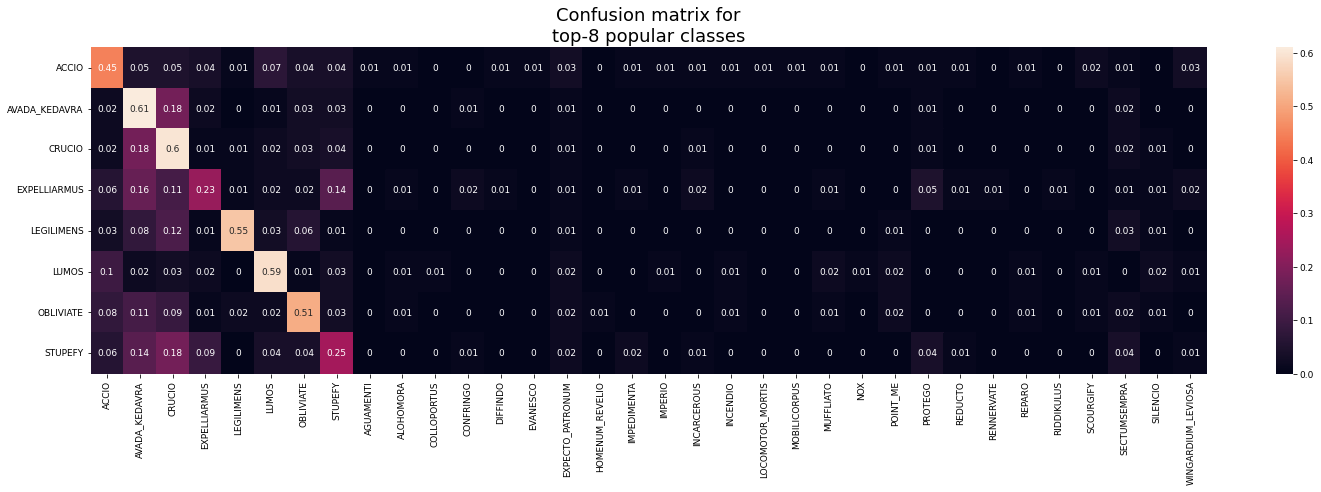

In [ ]:
matrix=confusion_matrix(y_true,y_pred)
matrix = np.round((matrix/(np.tile(matrix.sum(axis=1).reshape(-1,1),matrix.shape[0]))),2)
most_frequent_nums=np.arange(classes_lbs.shape[0])[np.isin(classes_lbs, most_frequent_classes)]
matrix = matrix[most_frequent_nums]
not_null_ids=np.arange(classes_lbs.shape[0])[(matrix.sum(axis=0)>0) & (~(np.isin(classes_lbs, most_frequent_classes)))]
matrix=matrix[:,np.append(most_frequent_nums,not_null_ids)]

plt.figure(figsize=(25,6))
plt.rcParams['font.size'] = 9
ax=sns.heatmap(matrix,annot = True, xticklabels = classes_lbs[np.append(most_frequent_nums,not_null_ids)], yticklabels = classes_lbs[most_frequent_nums])
ax.set_title(f"Confusion matrix for\ntop-{top_classes_num} popular classes",fontsize=18)
plt.show()

–í–æ-–ø–µ—Ä–≤—ã—Ö –≤–∏–¥–∏–º, —á—Ç–æ –¥–∏–∞–≥–æ–Ω–∞–ª—å —Å–∞–º–∞—è —è—Ä–∫–∞—è, —Ç–æ –µ—Å—Ç—å —ç—Ç–∏ –∫–ª–∞—Å—Å—ã –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—Å—è –≤–µ—Ä–Ω–æ –¥–æ–≤–æ–ª—å–Ω–æ —á–∞—Å—Ç–æ. –í–æ-–≤—Ç–æ—Ä—ã—Ö, –≤–∏–¥–∏–º, —á—Ç–æ –º–æ–¥–µ–ª—å —á–∞—â–µ –≤—Å–µ–≥–æ –ø—É—Ç–∞–µ—Ç –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∫–ª–∞—Å—Å—ã —Å –ø–æ–ø—É–ª—è—Ä–Ω—ã–º–∏ (–æ–±–ª–∞—Å—Ç—å —Å—Ä–µ–∑–∞ –∑–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–º 8*8, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∞—è –æ—à–∏–±–∫–∞–º –º–æ–¥–µ–ª–∏ –≤ —Å—Ç–æ—Ä–æ–Ω—É –º–µ–Ω–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤, —Å–æ–≤—Å–µ–º —á—ë—Ä–Ω–∞—è).

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –∏–∑–æ–±—Ä–∞–∑–∏–º —Å—Ä–µ–∑ confusion matrix –¥–ª—è —Ç–æ–ø $n$ —Å–∞–º—ã—Ö –Ω–µ–ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤. –°—Ä–µ–∑ –≤—ã–≥–ª—è–¥–∏—Ç —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º –æ–±—Ä–∞–∑–æ–º: –ø–æ –≤–µ—Ä—Ç–∏–∫–∞–ª–∏ –æ—Ç–ª–æ–∂–µ–Ω—ã –Ω–∞—à–∏ —Ç–æ–ø $n$ –∫–ª–∞—Å—Å–æ–≤ –ø–æ –ø–æ—Ä—è–¥–∫—É, –ø–æ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–∏ - –Ω–∞—à–∏ —Ç–æ–ø $n$ –∫–ª–∞—Å—Å–æ–≤ –∏ –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ, —Å –∫–æ—Ç–æ—Ä—ã–º–∏ –º–æ–¥–µ–ª—å –∏—Ö –ø—É—Ç–∞–µ—Ç. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –∫–∞–∂–¥–∞—è —Å—Ç—Ä–æ—á–∫–∞ —Å—Ä–µ–∑–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –¥–ª—è $i$-–≥–æ —Ä–µ–¥–∫–æ–≥–æ –∫–ª–∞—Å—Å–∞.

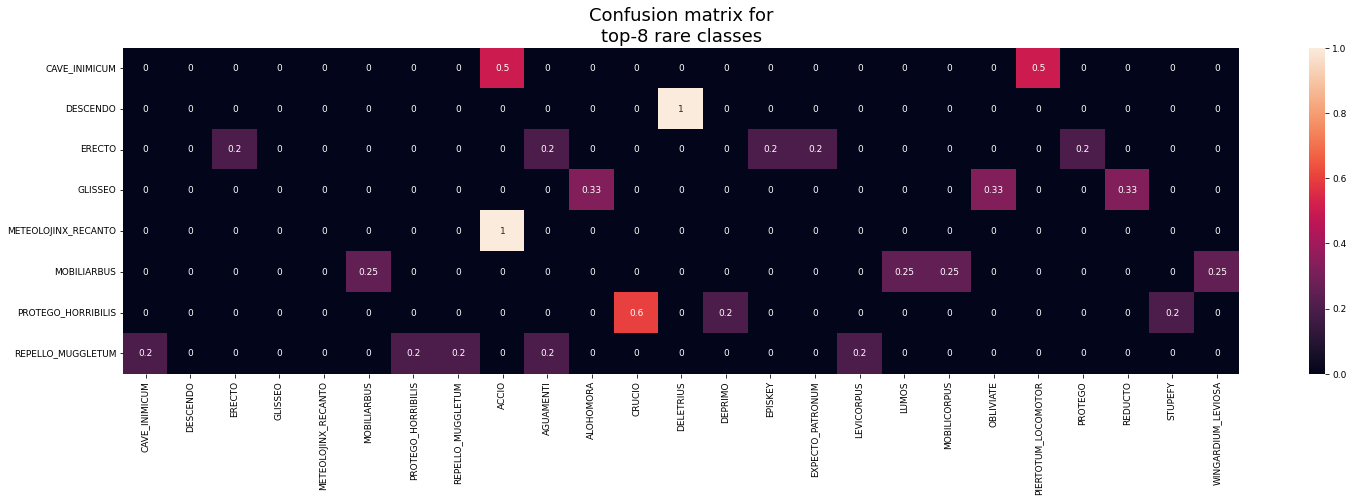

In [ ]:
matrix=confusion_matrix(y_true,y_pred)
matrix = np.round((matrix/(np.tile(matrix.sum(axis=1).reshape(-1,1),matrix.shape[0]))),2)
most_rare_nums=np.arange(classes_lbs.shape[0])[np.isin(classes_lbs, most_rare_classes)]
matrix = matrix[most_rare_nums]
not_null_ids=np.arange(classes_lbs.shape[0])[(matrix.sum(axis=0)>0) & (~(np.isin(classes_lbs, most_rare_classes)))]
matrix=matrix[:,np.append(most_rare_nums,not_null_ids)]

plt.figure(figsize=(25,6))
plt.rcParams['font.size'] = 9
ax=sns.heatmap(matrix,annot = True, xticklabels = classes_lbs[np.append(most_rare_nums,not_null_ids)], yticklabels = classes_lbs[most_rare_nums])
ax.set_title(f"Confusion matrix for\ntop-{top_classes_num} rare classes",fontsize=18)
plt.show()

–ü–æ —Å—Ä–µ–∑—É –≤–∏–¥–∏–º, —á—Ç–æ, –≤–æ-–ø–µ—Ä–≤—ã—Ö, –º—ã –≤–æ–æ–±—â–µ –¥–æ–≤–æ–ª—å–Ω–æ —Ä–µ–¥–∫–æ —É–≥–∞–¥—ã–≤–∞–µ–º. –≠—Ç–æ –Ω–µ —É–¥–∏–≤–∏—Ç–µ–ª—å–Ω–æ, —Ç–∞–∫ –∫–∞–∫ –¥–ª—è —ç—Ç–∏—Ö –∫–ª–∞—Å—Å–æ–≤ —É–∂ —Å–æ–≤—Å–µ–º –º–∞–ª–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, –¥–∞–∂–µ —Å –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è–º–∏. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –∑–∞–º–µ—Ç–Ω–æ, —á—Ç–æ —á—Ç–æ –º–æ–¥–µ–ª—å —Ä–µ–¥–∫–∏–µ –∫–ª–∞—Å—Å—ã –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–ª—É—á–∞–µ–≤ –æ—Ç–Ω–æ—Å–∏—Ç –∫ —Å–∞–º—ã–º –ø–æ–ø—É–ª—è—Ä–Ω—ã–º –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º (–Ω–∞–ø—Ä–∏–º–µ—Ä, "ACCIO", "CRUCCIO").

–¢–µ–ø–µ—Ä—å –æ—Ü–µ–Ω–∏–º —Ü–µ–ª–µ–≤—É—é –º–µ—Ç—Ä–∏–∫—É —Ç–∞–∫–∂–µ –Ω–∞ —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∏ —Å–∞–º—ã—Ö —Ä–µ–¥–∫–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö.

In [ ]:
f1_scores = f1_score(y_true,y_pred,average=None)
print(f"F1 macro –¥–ª—è —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤: {np.round(f1_scores[most_frequent_nums].mean(),2)}")
print(f"F1 macro –¥–ª—è —Å–∞–º—ã—Ö —Ä–µ–¥–∫–∏—Ö –∫–ª–∞—Å—Å–æ–≤: {np.round(f1_scores[most_rare_nums].mean(),2)}")

F1 macro –¥–ª—è —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤: 0.43
F1 macro –¥–ª—è —Å–∞–º—ã—Ö —Ä–µ–¥–∫–∏—Ö –∫–ª–∞—Å—Å–æ–≤: 0.13


–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –Ω–∞—à–∞ —Å–µ—Ç–∫–∞ –ø—É—Ç–∞–µ—Ç —Å–∞–º—ã–µ —Ä–µ–¥–∫–∏–µ –∫–ª–∞—Å—Å—ã –∏ –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–ª—É—á–∞–µ–≤ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ—Ç –∏—Ö —Å–∞–º—ã–º–∏ –ø–æ–ø—É–ª—è—Ä–Ω—ã–º–∏ –∫–ª–∞—Å—Å–∞–º–∏. –ù–æ –µ—Å—Ç—å –∏ –¥—Ä—É–≥–∏–µ —Ç–∏–ø—ã –æ—à–∏–±–æ–∫. –¢–∞–∫, –∏–º–µ—é—Ç—Å—è –æ—à–∏–±–∫–∏ –¥–ª—è –ø–æ—Ö–æ–∂–∏—Ö –∑–∞–∫–ª—è—Ç–∏–π:

1. –ü–µ—Ä–≤–∞–π –ø–∞—Ä–∞ –ø–æ—Ö–æ–∂–∏—Ö –∑–∞–∫–ª—è—Ç–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–¥–µ–ª—å –ø—É—Ç–∞–µ—Ç, –±—ã–ª–∞ —É–∂–µ –≤–∏–¥–Ω–∞ –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö —Å—Ä–µ–∑–æ–≤ confusion matrix. –≠—Ç–æ 2 –Ω–µ–ø—Ä–æ—Å—Ç–∏—Ç–µ–ª—å–Ω—ã—Ö –∑–∞–∫–ª—è—Ç—å—è AVADA_KEDAVRA –∏ CRUCIO. –û—Ç—Ä–∏—Å—É–µ–º –¥–ª—è –Ω–∏—Ö –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω–æ —Å—Ä–µ–∑ confusion matrix:

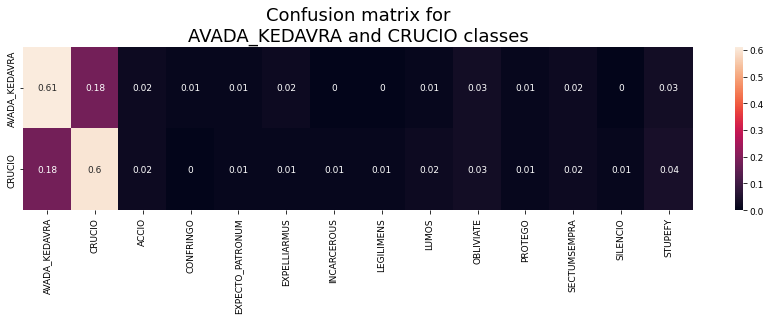

In [ ]:
difficult_classes = np.array(["AVADA_KEDAVRA","CRUCIO"])

matrix=confusion_matrix(y_true,y_pred)
matrix = np.round((matrix/(np.tile(matrix.sum(axis=1).reshape(-1,1),matrix.shape[0]))),2)
difficult_classes_nums=np.arange(classes_lbs.shape[0])[np.isin(classes_lbs, difficult_classes)]
matrix = matrix[difficult_classes_nums]
not_null_ids=np.arange(classes_lbs.shape[0])[(matrix.sum(axis=0)>0) & (~(np.isin(classes_lbs, difficult_classes)))]
matrix=matrix[:,np.append(difficult_classes_nums,not_null_ids)]

plt.figure(figsize=(15,3))
plt.rcParams['font.size'] = 9
ax=sns.heatmap(matrix,annot = True, xticklabels = classes_lbs[np.append(difficult_classes_nums,not_null_ids)], yticklabels = classes_lbs[difficult_classes_nums])
string=" and ".join(difficult_classes)
ax.set_title(f"Confusion matrix for\n{string} classes",fontsize=18)
plt.show()

–û–±–∞ —ç—Ç–∏—Ö –∑–∞–∫–ª–∏–Ω–∞–Ω–∏—è –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –≤ –ø–æ—Ö–æ–∂–∏—Ö —Å–∏—Ç—É–∞—Ü–∏—è—Ö, –¥–ª—è —É–±–∏–π—Å—Ç–≤–∞, –∏ –ø–æ –≥—Ä–∞—Ñ–∏–∫—É –æ—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –º–æ–¥–µ–ª—å –∏—Ö —á–∞—Å—Ç–æ –ø—É—Ç–∞–µ—Ç.

2. –í—Ç–æ—Ä–∞—è –ø–∞—Ä–∞ –ø–æ—Ö–æ–∂–∏—Ö –∑–∞–∫–ª–∏–Ω–∞–Ω–∏–π - –≤–∫–ª—é—á–∏—Ç—å –∏ –≤—ã–∫–ª—é—á–∏—Ç—å —Å–≤–µ—Ç. –û—Ç—Ä–∏—Å—É–µ–º –¥–ª—è –Ω–∏—Ö –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω–æ —Å—Ä–µ–∑ confusion matrix:

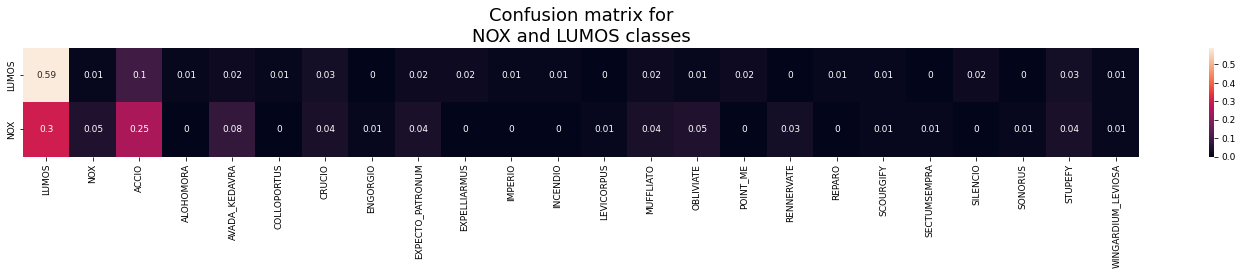

In [ ]:
difficult_classes = np.array(["NOX", "LUMOS"])

matrix=confusion_matrix(y_true,y_pred)
matrix = np.round((matrix/(np.tile(matrix.sum(axis=1).reshape(-1,1),matrix.shape[0]))),2)
difficult_classes_nums=np.arange(classes_lbs.shape[0])[np.isin(classes_lbs, difficult_classes)]
matrix = matrix[difficult_classes_nums]
not_null_ids=np.arange(classes_lbs.shape[0])[(matrix.sum(axis=0)>0) & (~(np.isin(classes_lbs, difficult_classes)))]
matrix=matrix[:,np.append(difficult_classes_nums,not_null_ids)]

plt.figure(figsize=(25,2))
plt.rcParams['font.size'] = 9
ax=sns.heatmap(matrix,annot = True, xticklabels = classes_lbs[np.append(difficult_classes_nums,not_null_ids)], yticklabels = classes_lbs[difficult_classes_nums])
string=" and ".join(difficult_classes)
ax.set_title(f"Confusion matrix for\n{string} classes",fontsize=18)
plt.show()

–°–ª–µ–¥—É—é—â–∏–π —Ä–∞–∑–¥–µ–ª –ø–æ—Å–≤—è—â—ë–Ω –ø–æ–ø—ã—Ç–∫–∞–º –ø–æ–¥–Ω—è—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏. –ü–æ–ø—Ä–æ–±—É–µ–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä—ã –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏. –ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–π BERT –∏–∑ —á–µ–∫–ø–æ–∏–Ω—Ç–∞ "distilbert-base-uncased" –∏ –¥–æ–æ–±—É—á–∏–º –µ–≥–æ:

In [ ]:
! pip -q install transformers datasets

In [ ]:
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments
from datasets import load_metric
from transformers import TrainingArguments, Trainer

In [ ]:
MODEL_CHECKPOINT = "distilbert-base-uncased"

In [ ]:
int2class = dict(enumerate(np.sort(train["target"].unique())))
class2int = {word: num for num, word in int2class.items()}

tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

def tokenize_function(examples):
    return tokenizer(examples["text"],truncation=True)

def make_dataset_for_transformer(train):
    train_dataset = Dataset.from_pandas(train[["text","target"]])
    train_dataset = train_dataset.rename_columns({'target':'label', 'text':'text'})
    train_dataset = train_dataset.map(lambda x: {'label':class2int[x['label']],'text':x['text']})
    tokenized_dataset = train_dataset.map(tokenize_function, batched=True)
    return tokenized_dataset

In [ ]:
train_dataset = make_dataset_for_transformer(train)
eval_dataset = make_dataset_for_transformer(val)

  0%|          | 0/60980 [00:00<?, ?ex/s]

  0%|          | 0/61 [00:00<?, ?ba/s]

  0%|          | 0/7605 [00:00<?, ?ex/s]

  0%|          | 0/8 [00:00<?, ?ba/s]

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL_CHECKPOINT, num_labels=len(int2class))

metric = load_metric("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels, average="macro")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifi

In [ ]:
training_args = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="steps",
    eval_steps = 200,
    per_device_train_batch_size=32,
    seed=42,
    learning_rate=1e-4,
    num_train_epochs=1000
)

In [ ]:
trainer = Trainer(
    model,
    training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [12]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 60980
  Num Epochs = 1000
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1906000
  Number of trainable parameters = 67018837
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is f

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 7605
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 7605
  Batch size = 8
Saving model checkpoint to test_trainer/checkpoint-500
Configuration saved in test_trainer/checkpoint-500/config.json
Model weights saved in test_trainer/checkpoint-500/pytorch_model.bin
tokenizer config file saved in test_trainer/checkpoint-500/tokenizer_config.json
Special tokens file saved in test_trainer/checkpoint

Saving model checkpoint to test_trainer/checkpoint-7500
Configuration saved in test_trainer/checkpoint-7500/config.json
Model weights saved in test_trainer/checkpoint-7500/pytorch_model.bin
tokenizer config file saved in test_trainer/checkpoint-7500/tokenizer_config.json
Special tokens file saved in test_trainer/checkpoint-7500/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 7605
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num

KeyboardInterrupt: ignored

–°—É–¥—è –ø–æ –¥–∏–Ω–∞–º–∏–∫–µ –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ, –º—ã –Ω–∞—á–∞–ª–∏ –ø–µ—Ä–µ–æ–±—É—á–∞—Ç—å—Å—è. –í–µ—Ä–Ω—ë–º—Å—è –∫ –ª—É—á—à–µ–º—É —á–µ–∫–ø–æ–∏–Ω—Ç—É –∏ –æ–±–µ—Ä–Ω—ë–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å –≤ –ø–∞–π–ø–ª–∞–π–Ω: 

In [20]:
from transformers import pipeline

best_model=AutoModelForSequenceClassification.from_pretrained("test_trainer//checkpoint-8000").to("cpu")
classification_pipeline = pipeline("text-classification",model=best_model,tokenizer=tokenizer);

loading configuration file test_trainer//checkpoint-8000/config.json
Model config DistilBertConfig {
  "_name_or_path": "test_trainer//checkpoint-8000",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18",
    "19": "LABEL_19",
    "20": "LABEL_20",
    "21": "LABEL_21",
    "22": "LABEL_22",
    "23": "LABEL_23",
    "24": "LABEL_24",
    "25": "LABEL_25",
    "26": "LABEL_26",
    "27": "LABEL_27",
    "28": "LABEL_28",
    "29": "LABEL_29",
    "30": "LABEL_

–†–∞–¥–∏ –∑–∞–±–∞–≤—ã –ø—Ä–æ–≤–µ—Ä–∏–º –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ —Å–≤–æ–∏—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö, –≤–∑—è—Ç—ã—Ö –∏–∑ –≥–æ–ª–æ–≤—ã:

In [23]:
example = "voldemort said i will kill you"
prediction = int2class[int(classification_pipeline(example)[0]["label"].strip("LABEL_"))]
print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å: {prediction}")

–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å: AVADA_KEDAVRA


In [24]:
example = "it is very dark"
prediction = int2class[int(classification_pipeline(example)[0]["label"].strip("LABEL_"))]
print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å: {prediction}")

–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å: LUMOS


In [25]:
example = "dementors are attacking"
prediction = int2class[int(classification_pipeline(example)[0]["label"].strip("LABEL_"))]
print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å: {prediction}")

–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å: EXPECTO_PATRONUM


–û—á–µ–Ω—å —Ö–æ—Ä–æ—à–æ, —É—á–∏—Ç—ã–≤–∞—è –µ—â—ë —Ç–æ, —á—Ç–æ —ç—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–µ –ø—Ä–∏—Ö–æ–¥–∏–ª–æ—Å—å –ø–æ–¥–±–∏—Ä–∞—Ç—å, –≤—Å—ë –ø–æ–ª—É—á–∏–ª–æ—Å—å —Å –ø–µ—Ä–≤–æ–≥–æ —Ä–∞–∑–∞!

–¢–µ–ø–µ—Ä—å –ø–æ—Å—á–∏—Ç–∞–µ–º —Ü–µ–ª–µ–≤—É—é –º–µ—Ç—Ä–∏–∫—É –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:

In [30]:
preds = test["text"].apply(lambda example: int2class[int(classification_pipeline(example)[0]["label"].strip("LABEL_"))])

In [29]:
metrics = f1_score(test["target"],preds,average="macro")
print(f"F1 macro avg. = {metrics}")

F1 macro avg. = 0.17255674207519123


–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –∏–º–µ–µ–º, —á—Ç–æ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä —Å–ø—Ä–∞–≤–∏–ª—Å—è —Å –∑–∞–¥–∞—á–µ–π –ª—É—á—à–µ –≤—Å–µ—Ö, —á—Ç–æ –≤–ø–æ–ª–Ω–µ –æ–∂–∏–¥–∞–µ–º–æ.

# –ß–∞—Å—Ç—å 4

–í —Ö–æ–¥–µ —Ä–∞–±–æ—Ç—ã, –≤–æ-–ø–µ—Ä–≤—ã—Ö, –±—ã–ª–∞ –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∞ —Ä–∞–±–æ—Ç–∞ –æ–¥–Ω–æ–π –∏–∑ —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ —Å–ª–æ–≤ –ø–æ —Ç–µ–∫—Å—Ç–∞–º fasttext. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –≥–æ–≤–æ—Ä—è—Ç –æ —Ç–æ–º, —á—Ç–æ —ç—Ç–∞ –º–æ–¥–µ–ª—å –º–Ω–æ–≥–æ–µ –≤—ã—É—á–∏–ª–∞, –Ω–æ –∏—Ö –Ω–µ–ª—å–∑—è –Ω–∞–∑–≤–∞—Ç—å –∏–¥–µ–∞–ª—å–Ω—ã–º–∏. –¢–µ–∫—Å—Ç—ã –¥–æ–≤–æ–ª—å–Ω–æ —Å–ª–æ–∂–Ω—ã–µ, –∏ —Å—É–¥—è –ø–æ –≤–∏–∑—É–∞–ª—å–Ω–æ–º—É –∞–Ω–∞–ª–∏–∑—É, —á–∞—Å—Ç—å –∏–∑ –Ω–∏—Ö –≤–æ–æ–±—â–µ –º–∞–ª–æ —Å–≤—è–∑–∞–Ω–∞ —Å –∫–Ω–∏–≥–∞–º–∏ –æ –ì–∞—Ä—Ä–∏ –ü–æ—Ç—Ç–µ—Ä–µ. –û–¥–Ω–∞–∫–æ –∫–∞–∫–∏–µ-—Ç–æ –ø—Ä–æ—Å—Ç—ã–µ —Å–≤—è–∑–∏ –º–æ–¥–µ–ª—å –≤—Å—ë-—Ç–∞–∫–∏ –≤—ã—É—á–∏–ª–∞ —Å—É–¥—è –ø–æ –∞–Ω–∞–ª–∏–∑—É —Å–∏–Ω–æ–Ω–∏–º–æ–≤, –∞—Å—Å–æ—Ü–∏–∞—Ü–∏–π. –í–æ-–≤—Ç–æ—Ä—ã—Ö, –≤ —Ä–∞–±–æ—Ç–µ –±—ã–ª–∞ –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∞ —Ä–∞–±–æ—Ç–∞ —Ä–µ–∫—É—Ä—Ä–µ–Ω—Ç–Ω—ã—Ö –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π –¥–ª—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –æ–ø–∏—Å–∞–Ω–∏–π —Å–∏—Ç—É–∞—Ü–∏–π –∏ –ø–æ–¥—Ö–æ–¥—è—â–∏—Ö –ø–æ–¥ –Ω–∏—Ö –∑–∞–∫–ª–∏–Ω–∞–Ω–∏–π. –í –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ, —Å—É–¥—è –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é –∫–∞—á–µ—Å—Ç–≤–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∏ –ø—Ä–∏–≤–µ–¥—ë–Ω–Ω—ã—Ö –∞–≤—Ç–æ—Ä–∞–º–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤, –ø–æ–ª—É—á–∏–ª–æ—Å—å —Å–¥–µ–ª–∞—Ç—å –Ω–µ–ø–ª–æ—Ö—É—é –º–æ–¥–µ–ª—å, –æ–ø–µ—Ä–µ–∂–∞—é—â—É—é –ø–æ —Ü–µ–ª–µ–≤–æ–π –º–µ—Ç—Ä–∏–∫–µ –≤—Å–µ –º–æ–¥–µ–ª–∏ –∏–∑ —Å—Ç–∞—Ç—å–∏. –û–¥–Ω–∞–∫–æ –∞–Ω–∞–ª–∏–∑ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –º–æ–¥–µ–ª—å —Å–∏–ª—å–Ω–æ –ø—É—Ç–∞–µ—Ç—Å—è –Ω–∞ —Ä–µ–¥–∫–∏—Ö –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ –∫–ª–∞—Å—Å–∞—Ö, –æ–±—ã—á–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É—è –∏—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã–º–∏ –∫–ª–∞—Å—Å–∞–º–∏. –ü–æ—ç—Ç–æ–º—É –∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–º–µ—Ä–æ–≤ —Ä–µ–¥–∫–∏—Ö –∫–ª–∞—Å—Å–æ–≤ –ø–æ–∑–≤–æ–ª–∏–ª–æ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏. –í —Ç—Ä–µ—Ç—å–∏—Ö, –∑–∞–¥–∞—á–∞ –±—ã–ª–∞ —Ä–µ—à–µ–Ω–∞ —Ç–∞–∫–∂–µ —Å –ø–æ–º–æ—â—å—é BERT. –û–∂–∏–¥–∞–µ–º–æ –¥–∞–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –ø–æ–∫–∞–∑–∞–ª–∞ —Å–∞–º—ã–π –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç. –ë–æ–ª–µ–µ —Ç–æ–≥–æ, —Ç–µ—Å—Ç—ã –Ω–∞ —Å–≤–æ–∏—Ö –∏–≥—Ä—É—à–µ—á–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö –∏–∑ –≥–æ–ª–æ–≤—ã –Ω–∞—Ç–∞–ª–∫–∏–≤–∞—é—Ç –Ω–∞ –º—ã—Å–ª—å, —á—Ç–æ –º–æ–¥–µ–ª—å –æ—á–µ–Ω—å –¥–∞–∂–µ –Ω–µ–ø–ª–æ—Ö–∞—è.